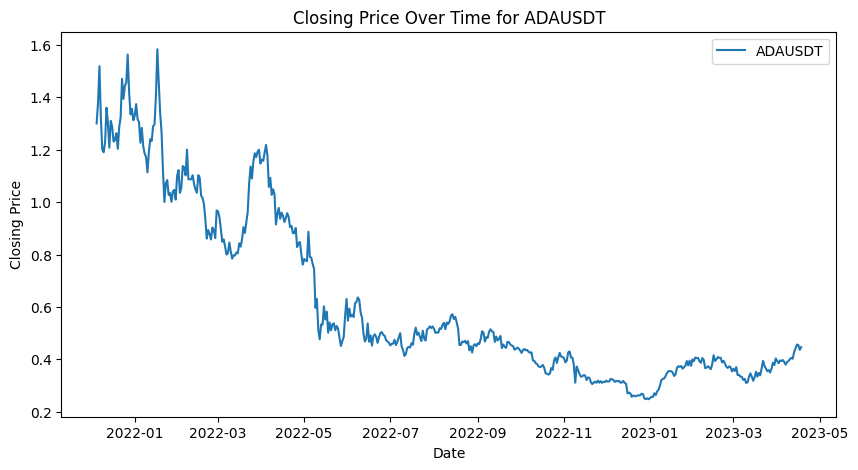

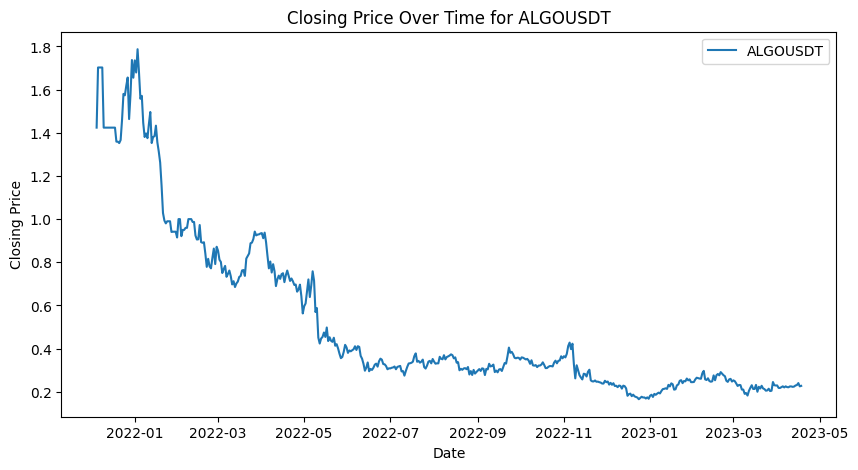

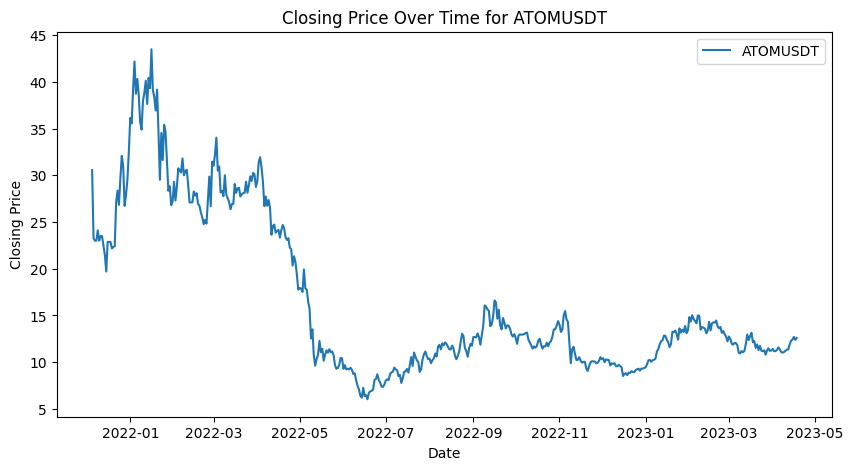

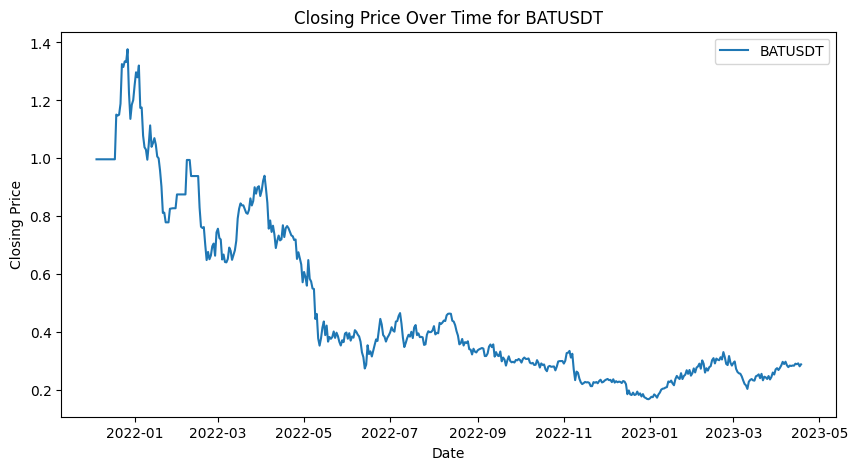

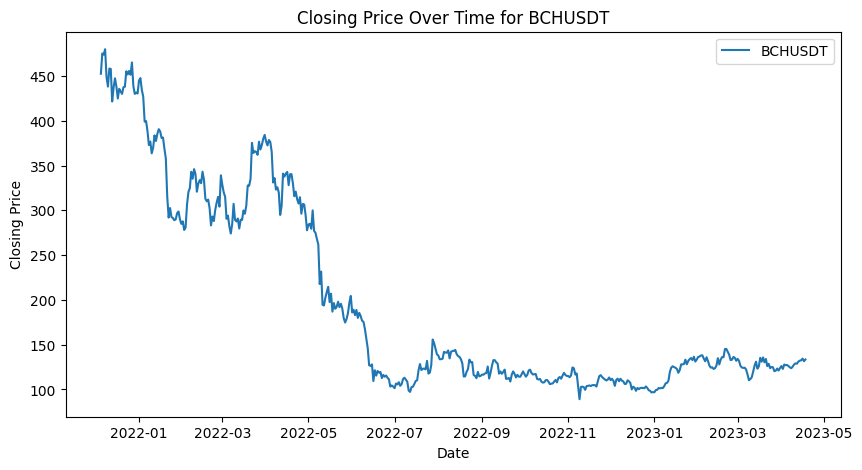

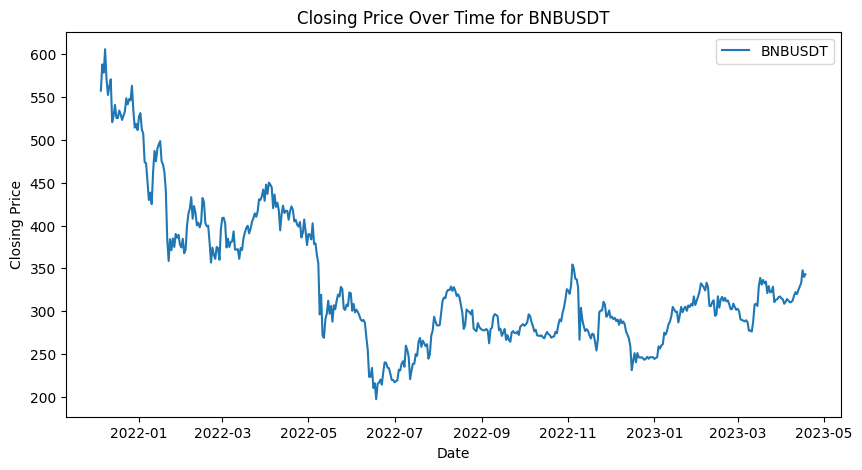

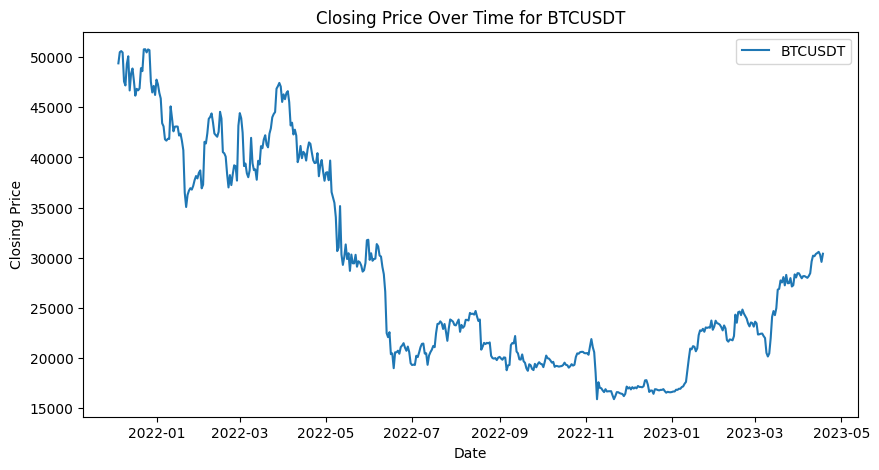

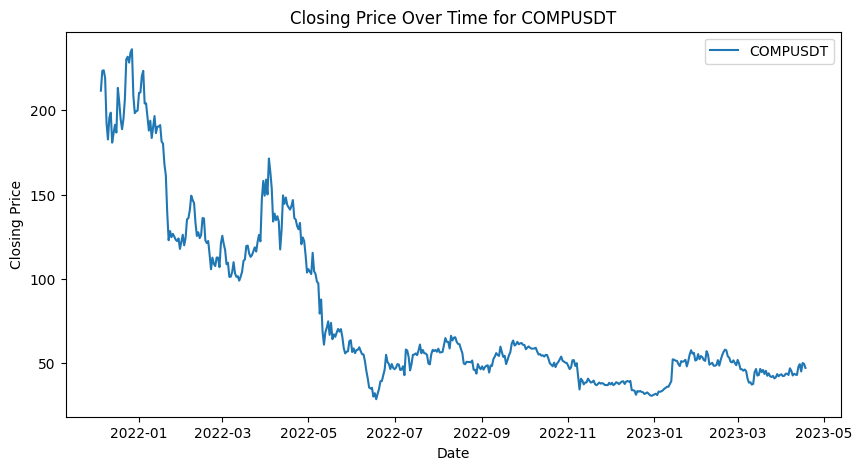

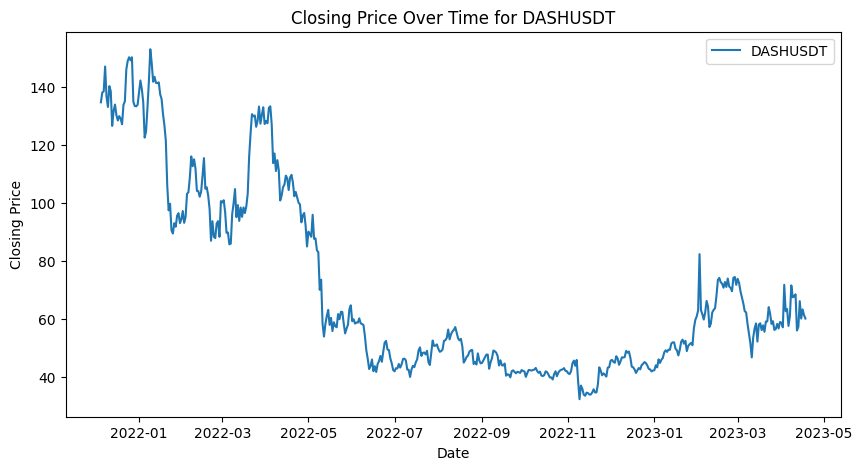

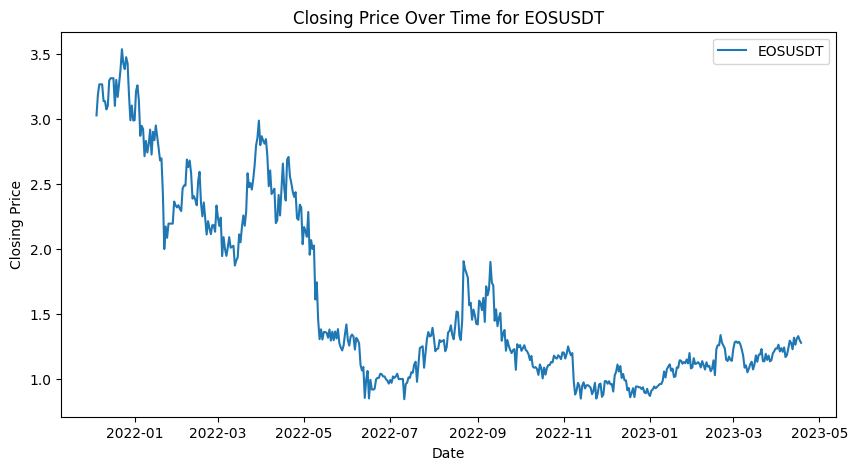

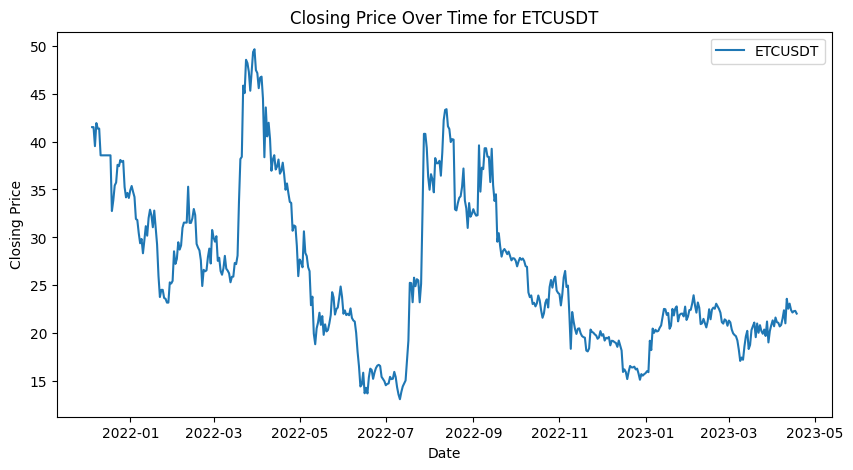

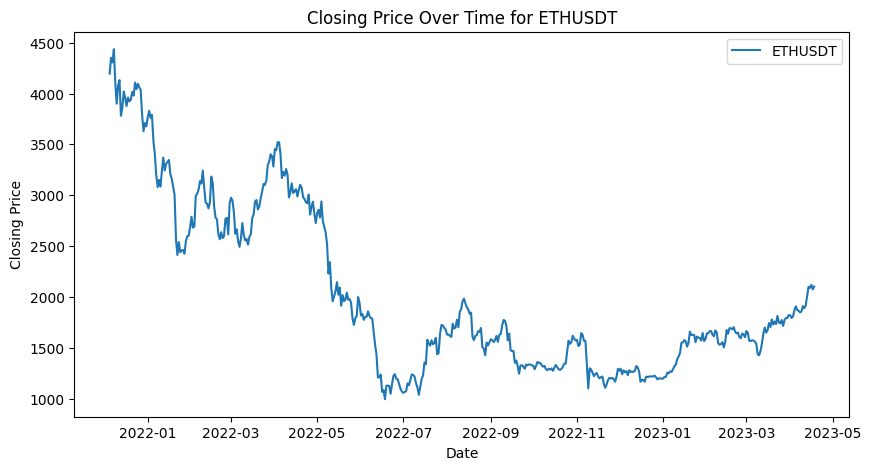

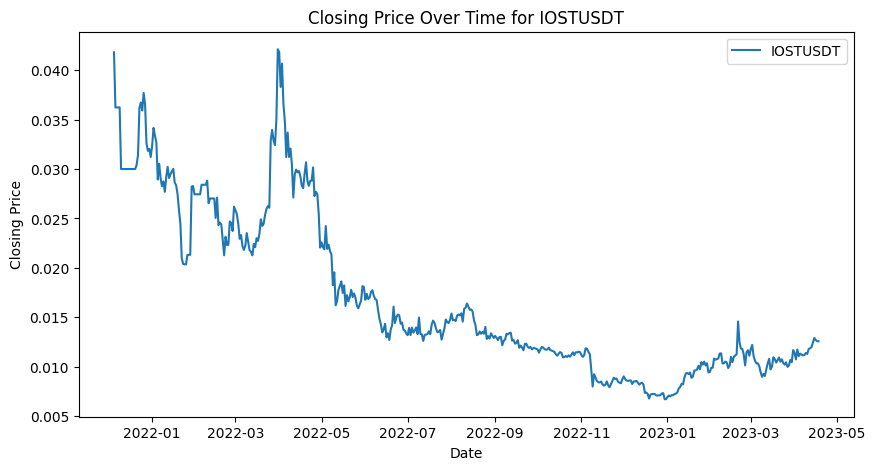

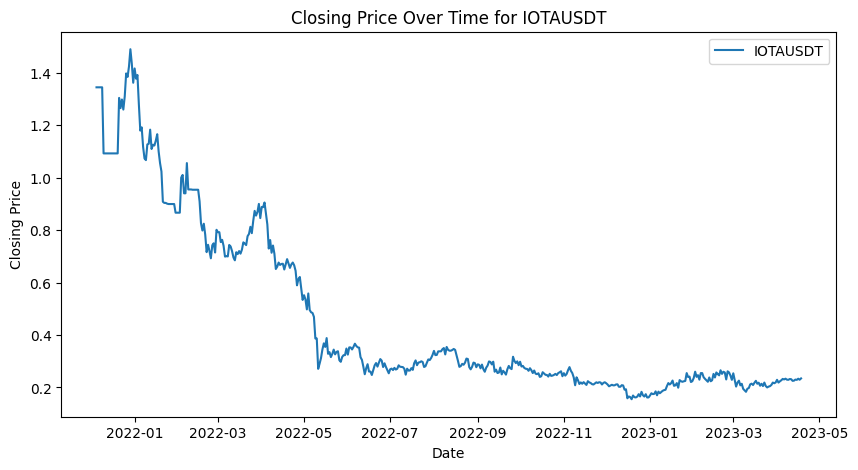

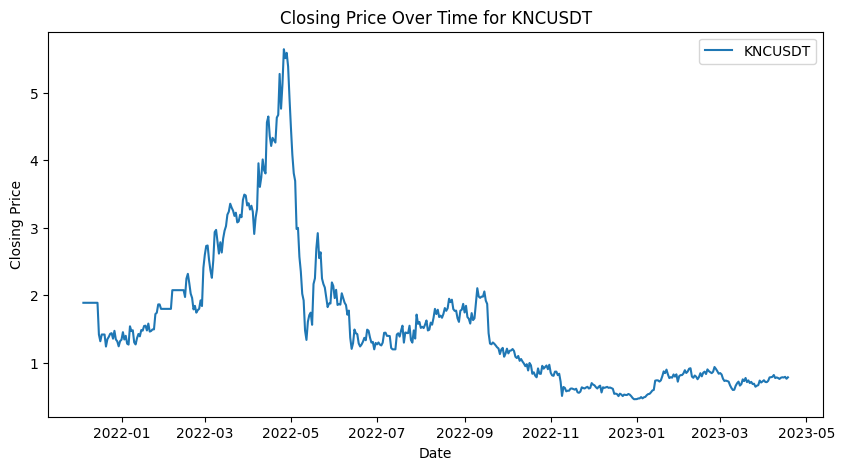

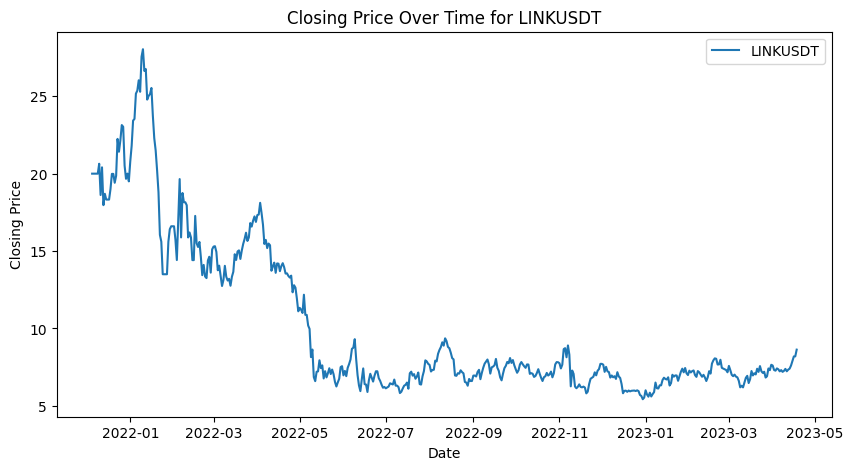

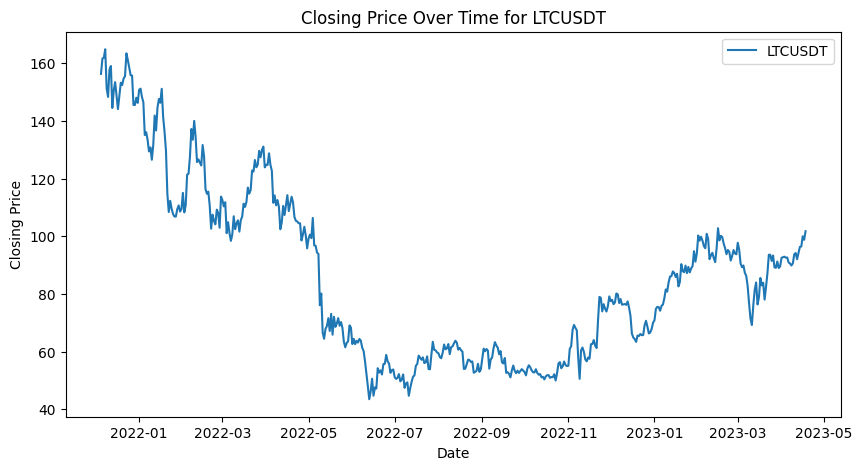

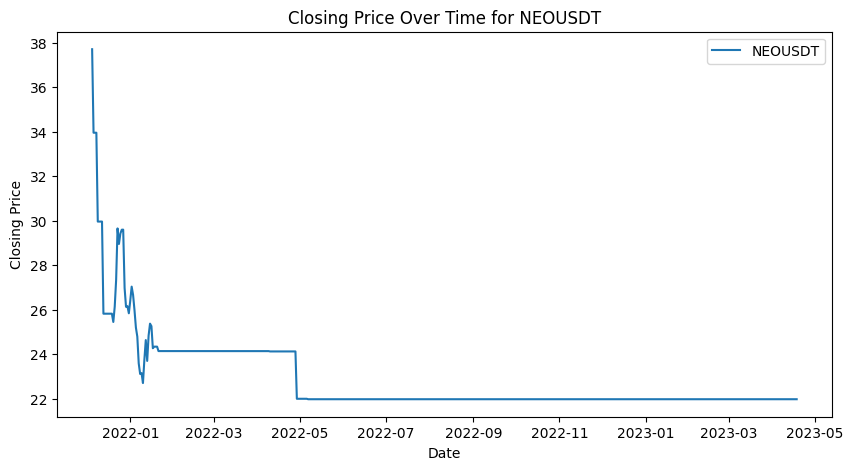

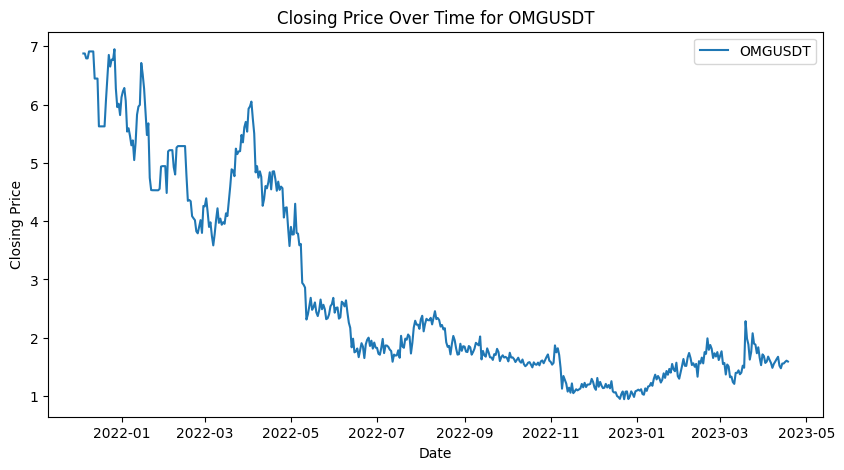

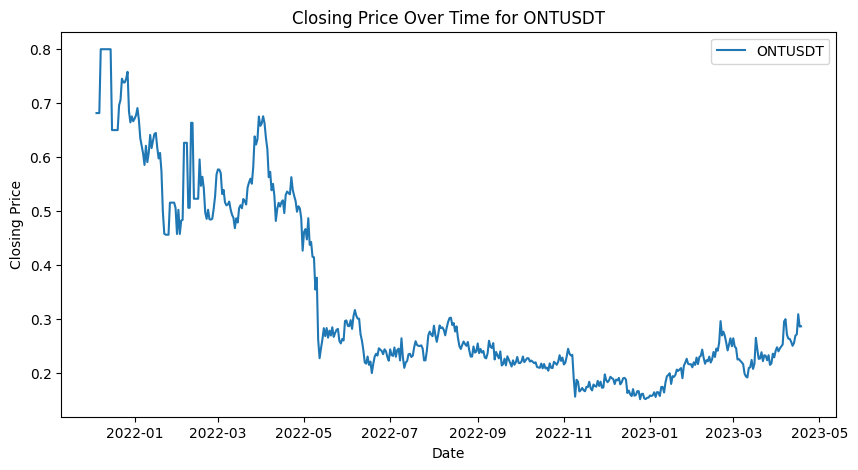

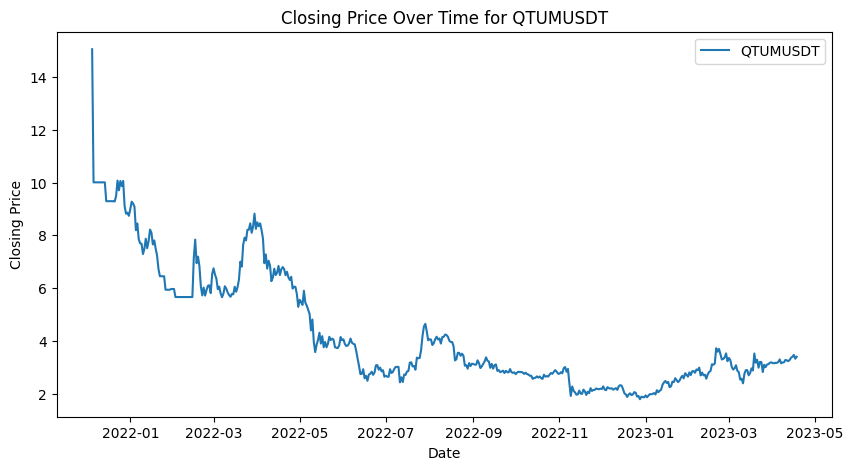

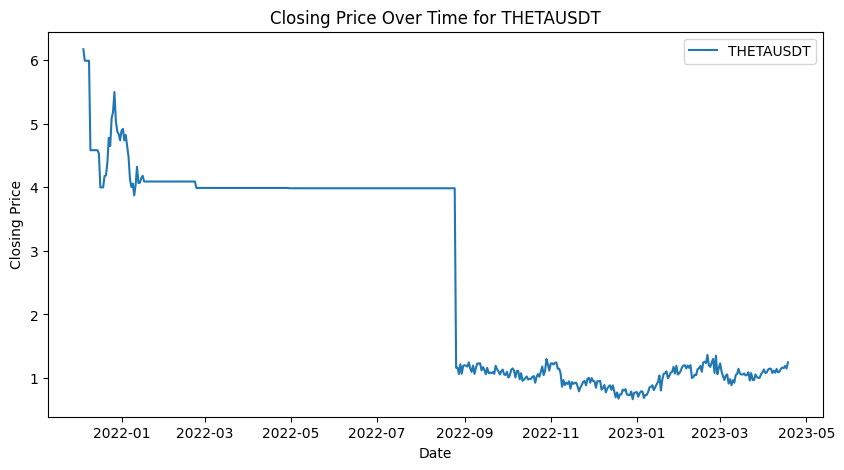

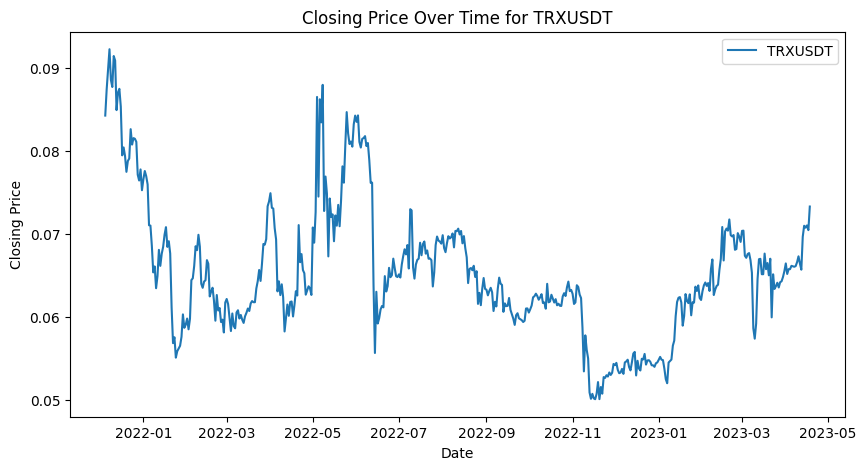

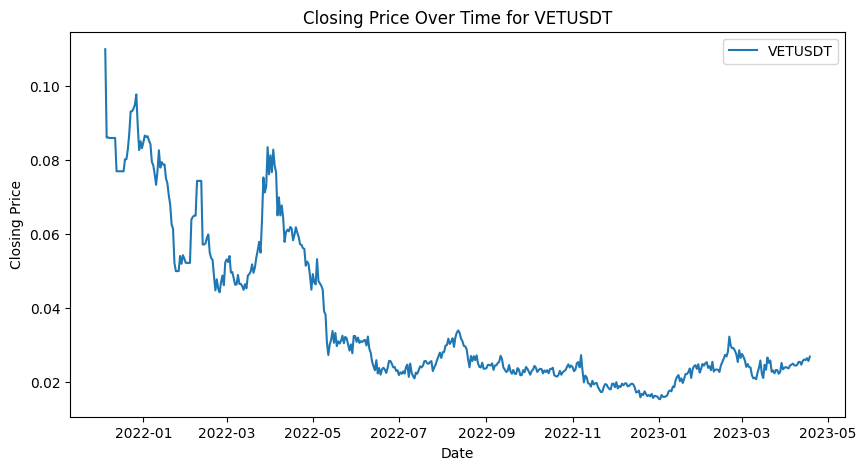

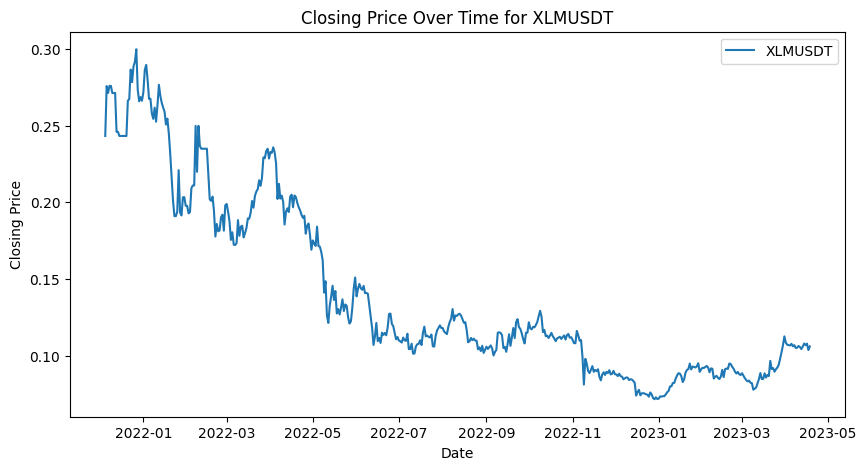

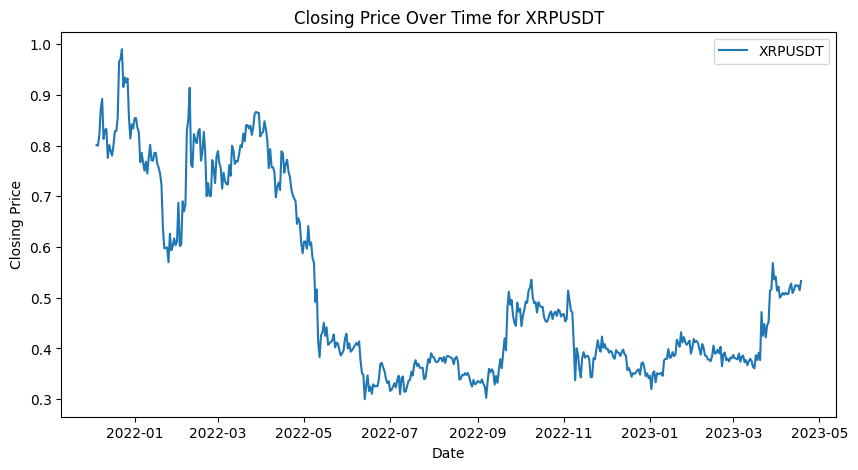

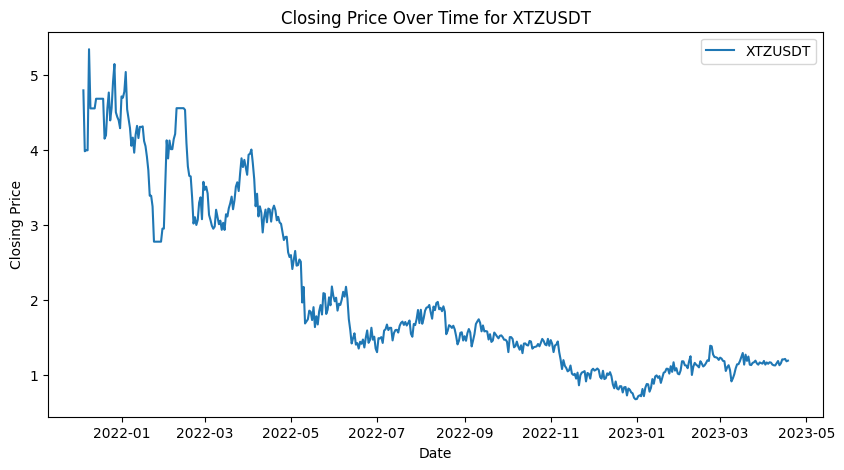

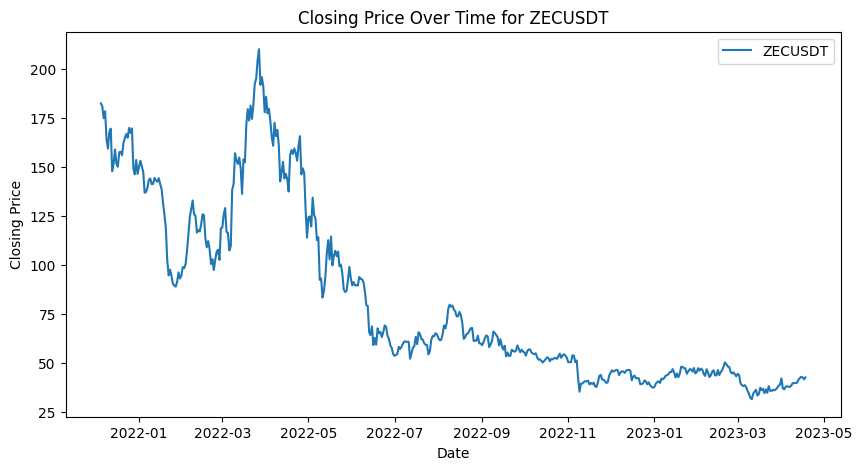

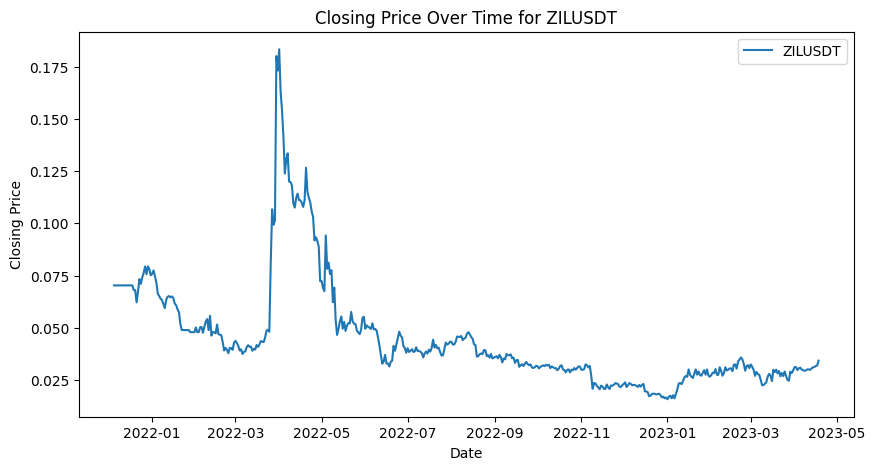

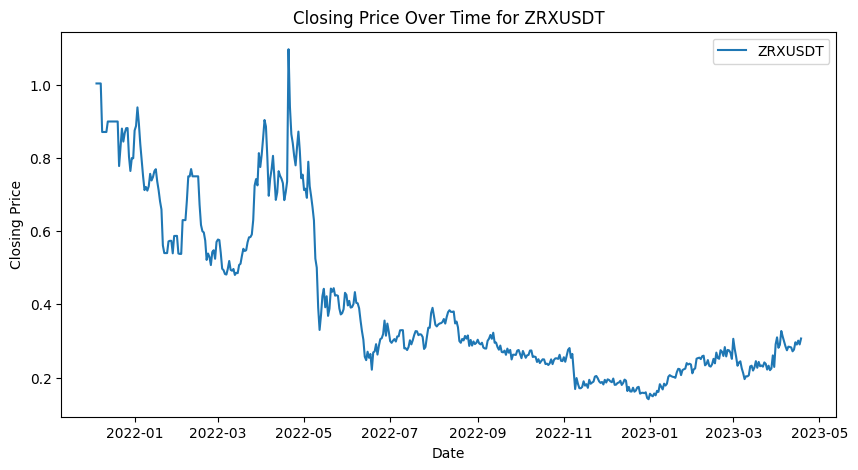

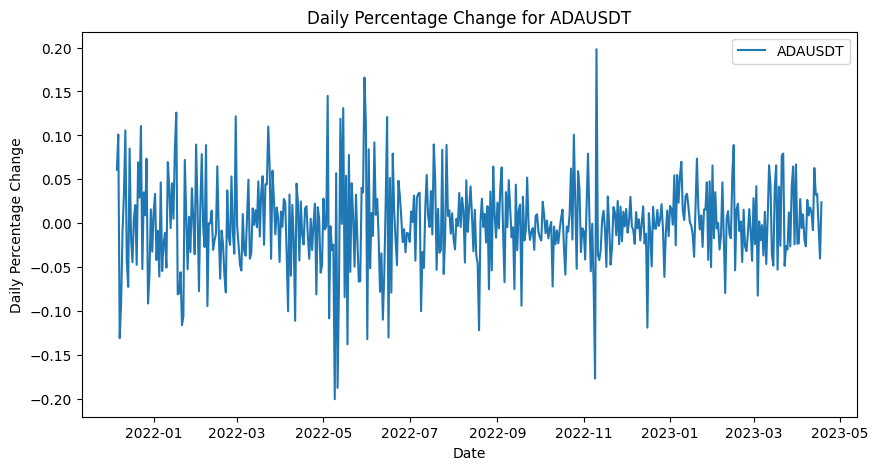

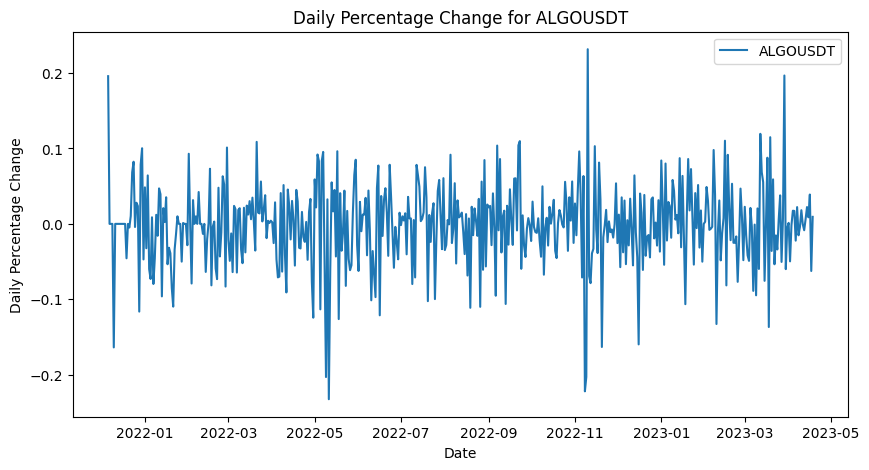

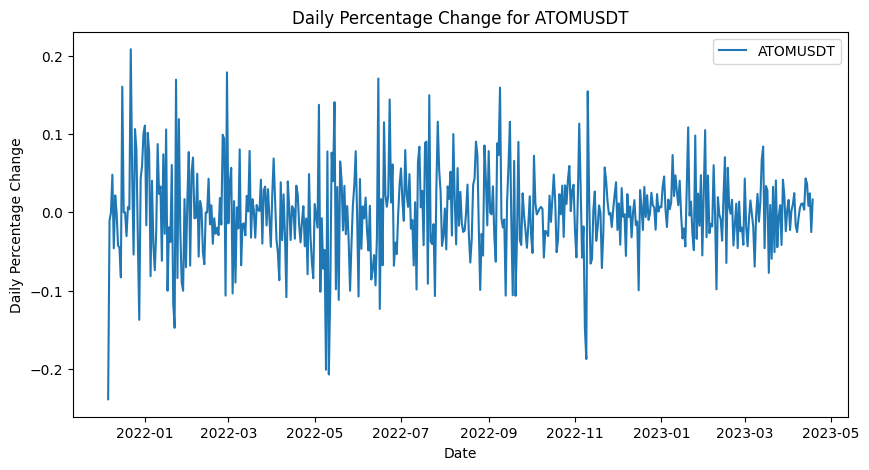

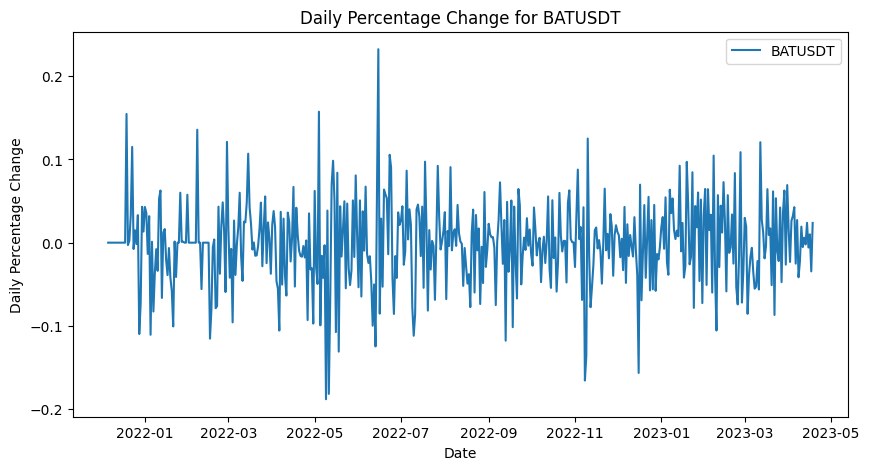

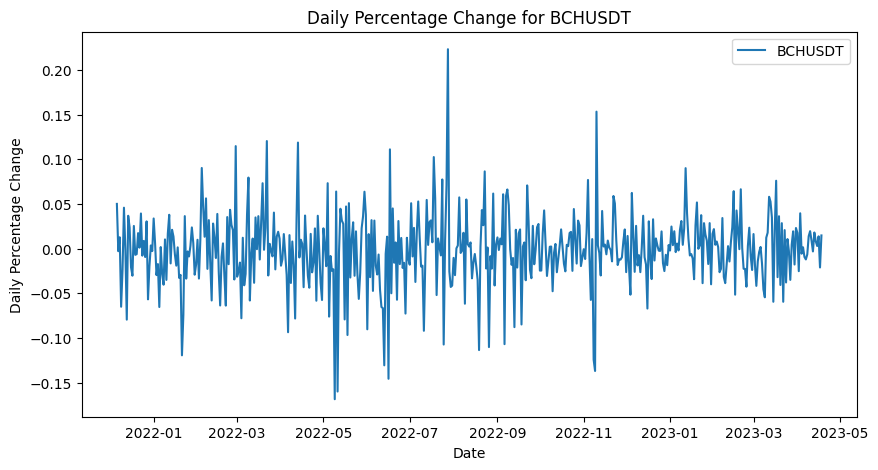

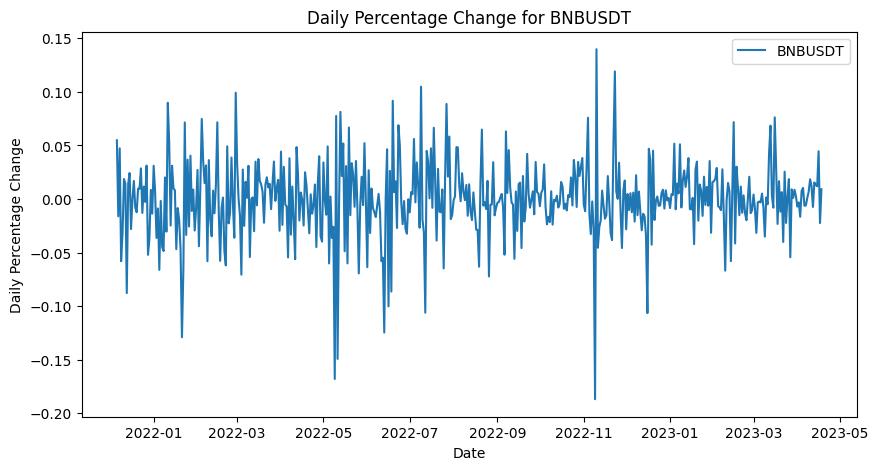

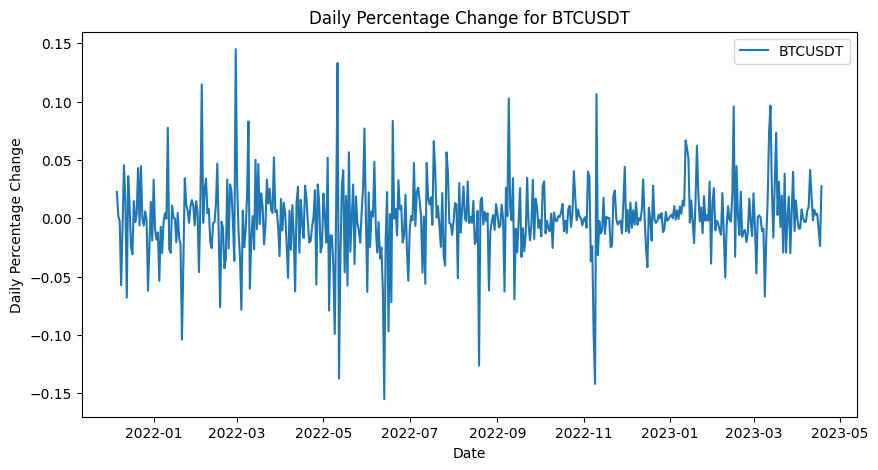

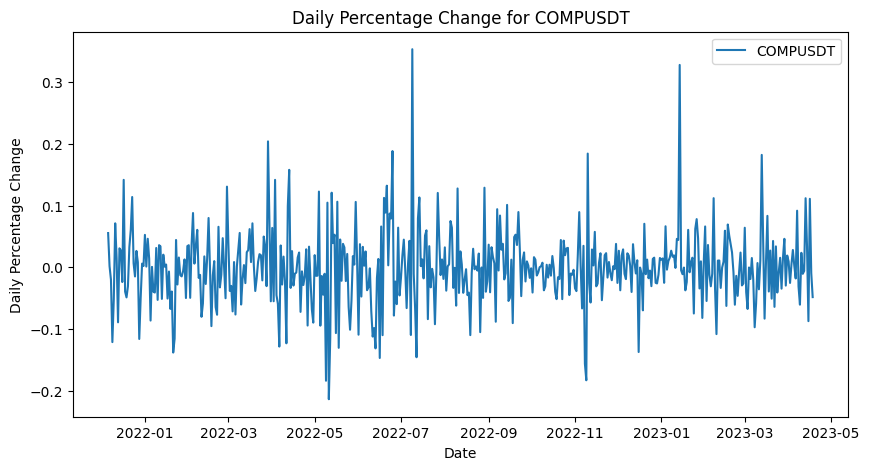

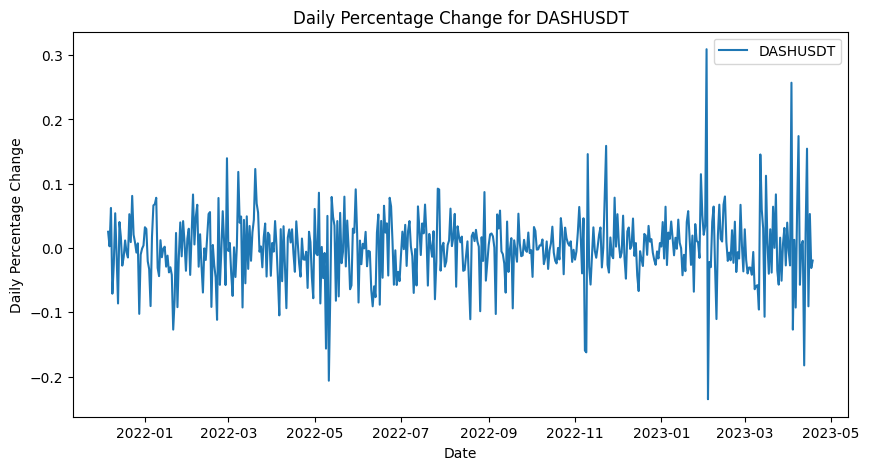

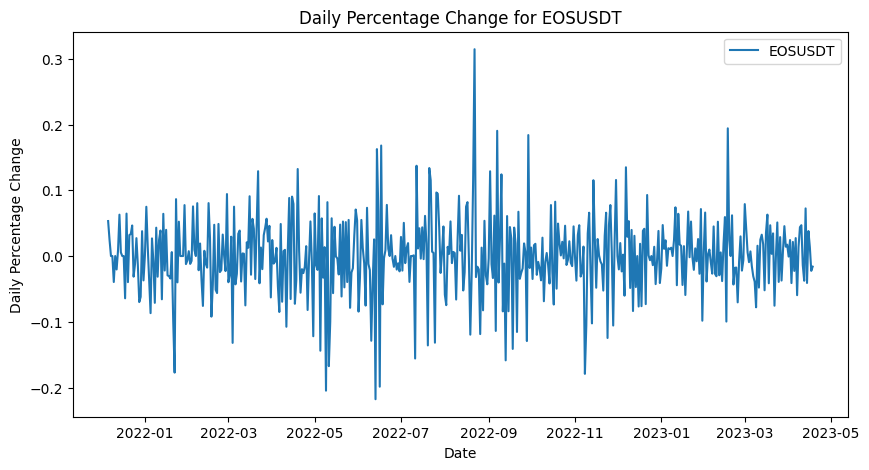

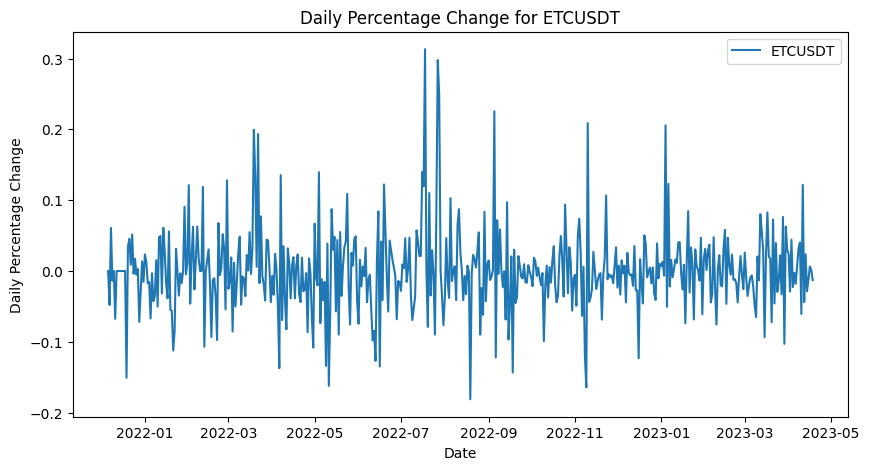

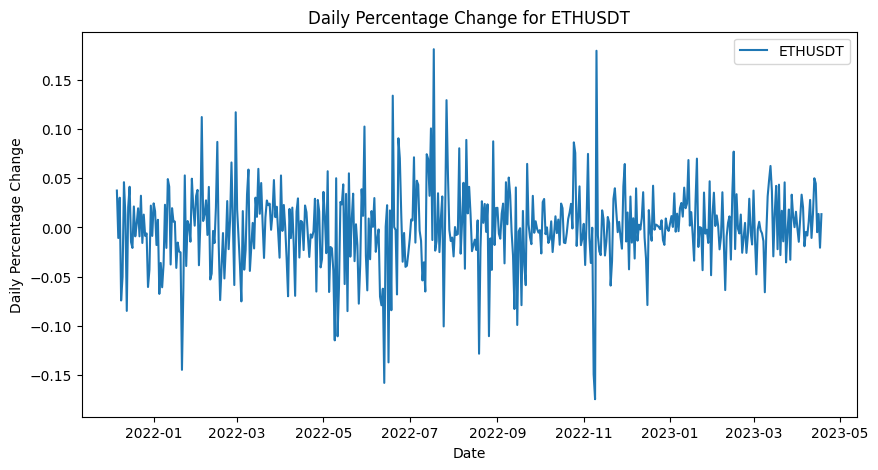

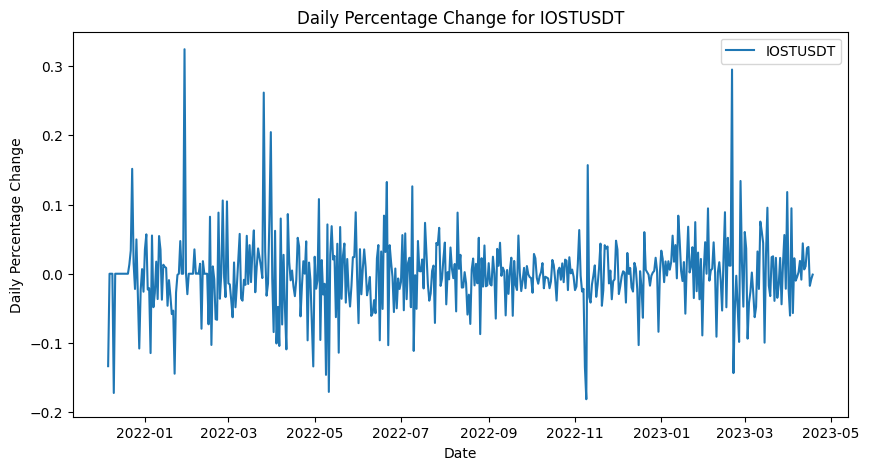

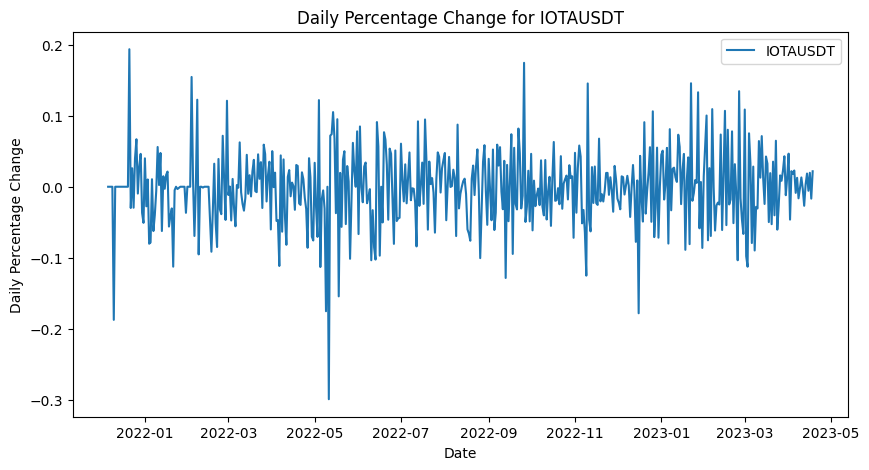

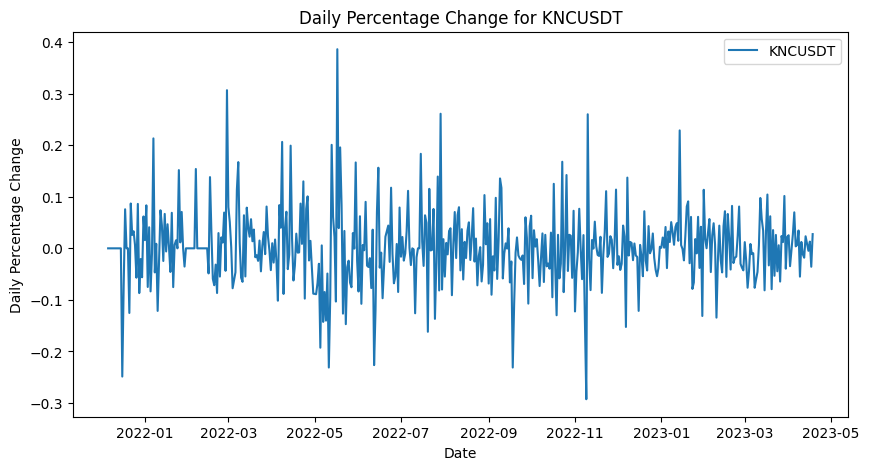

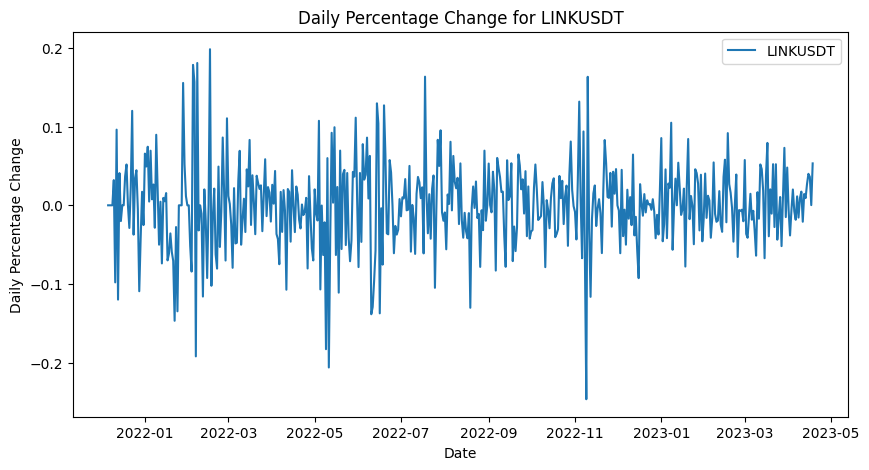

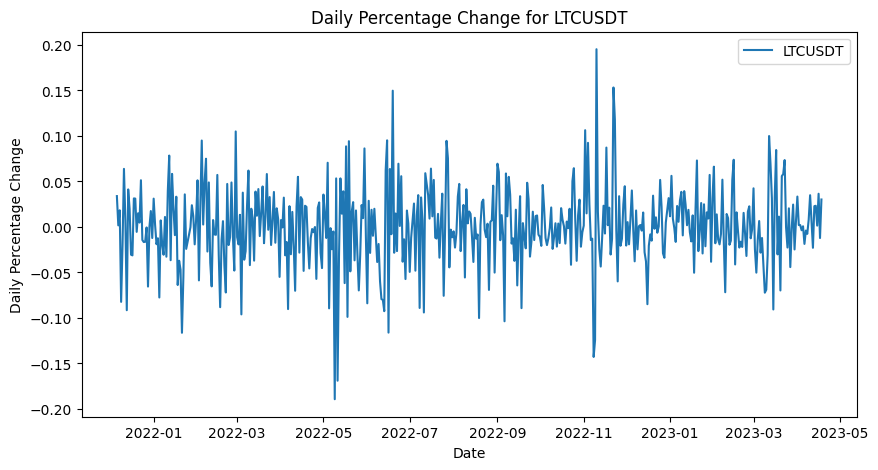

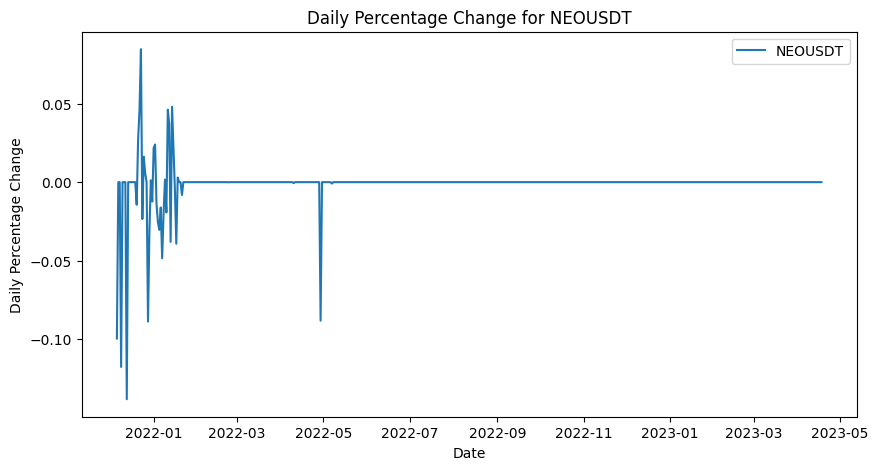

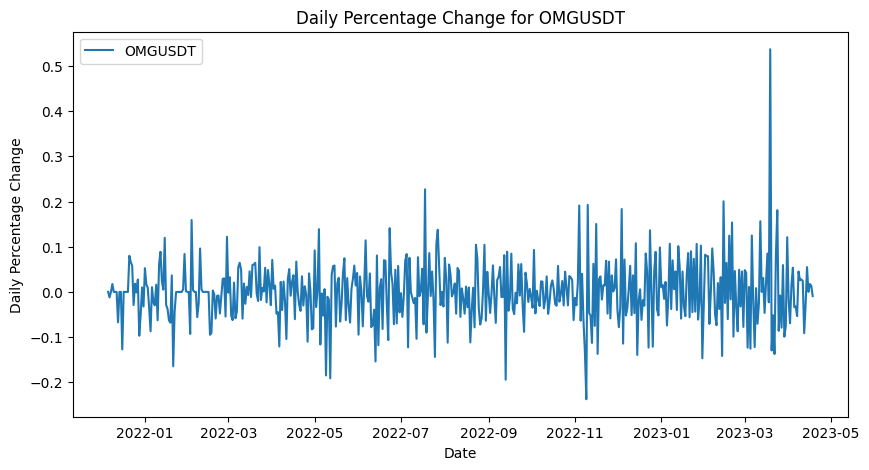

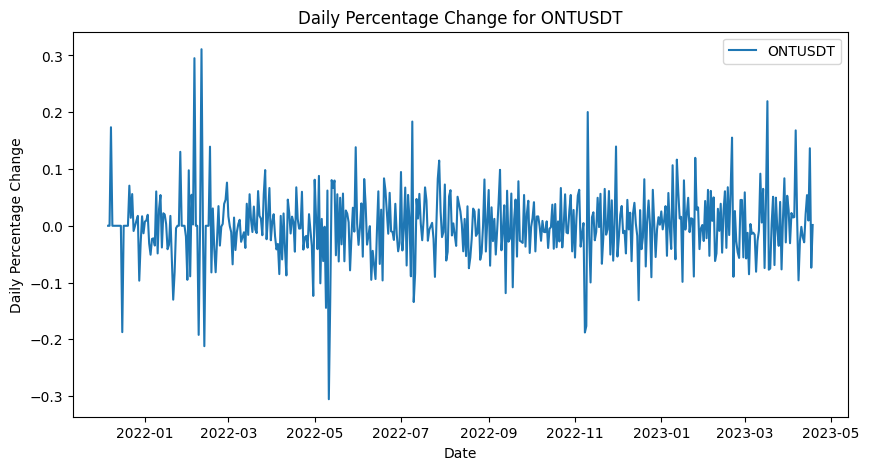

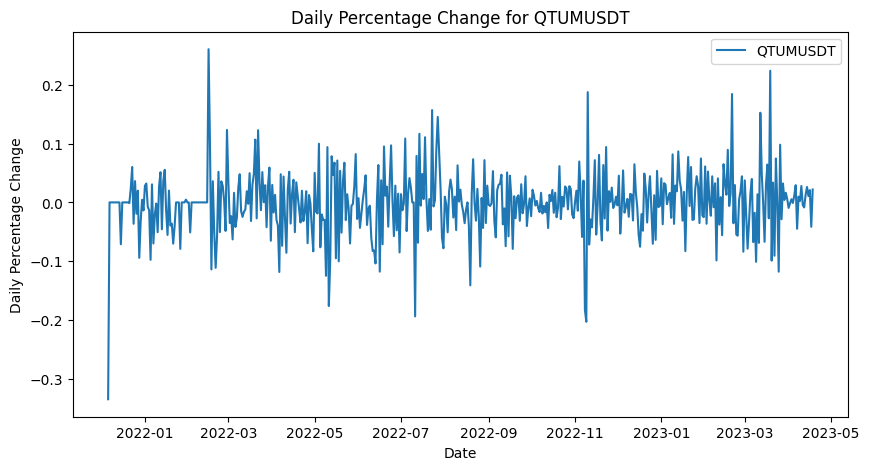

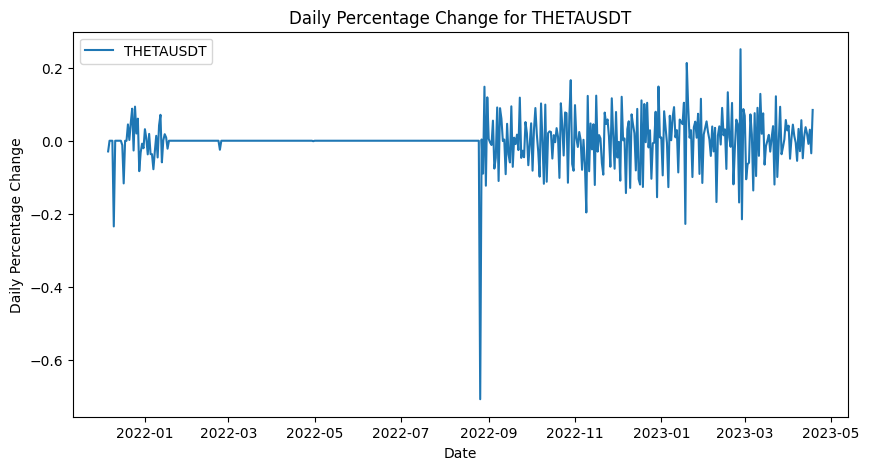

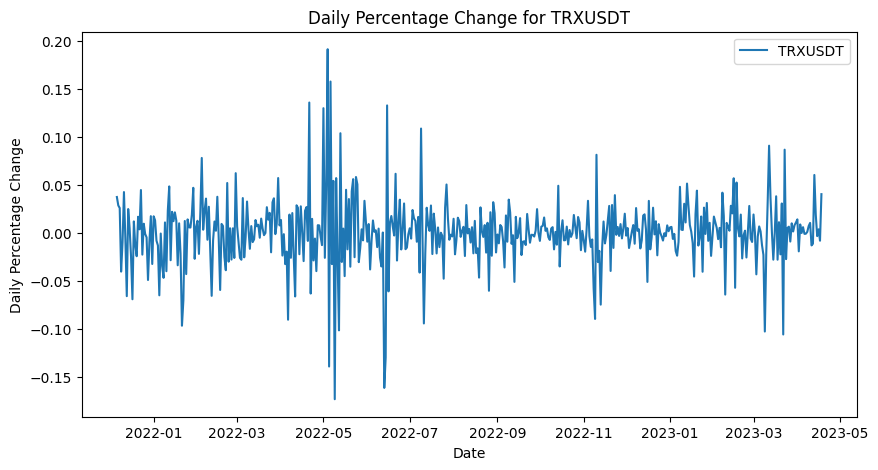

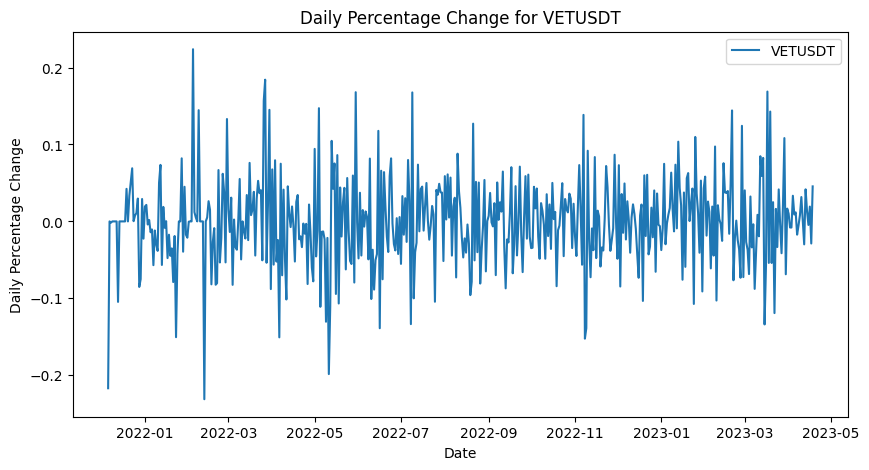

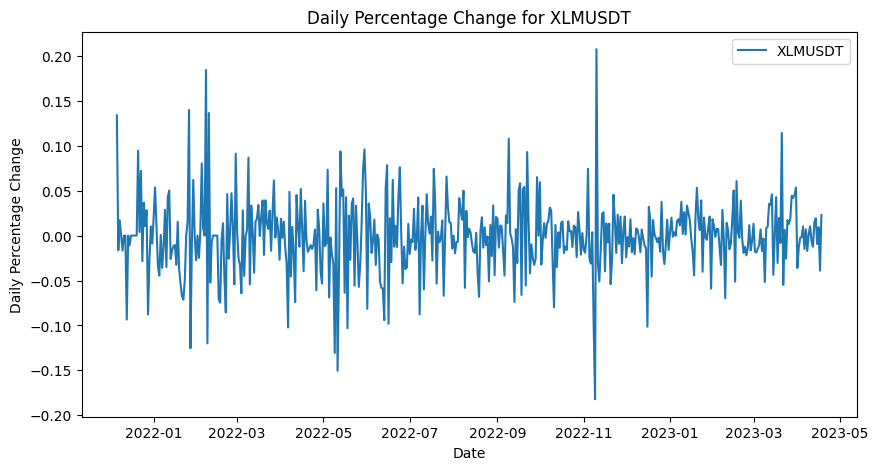

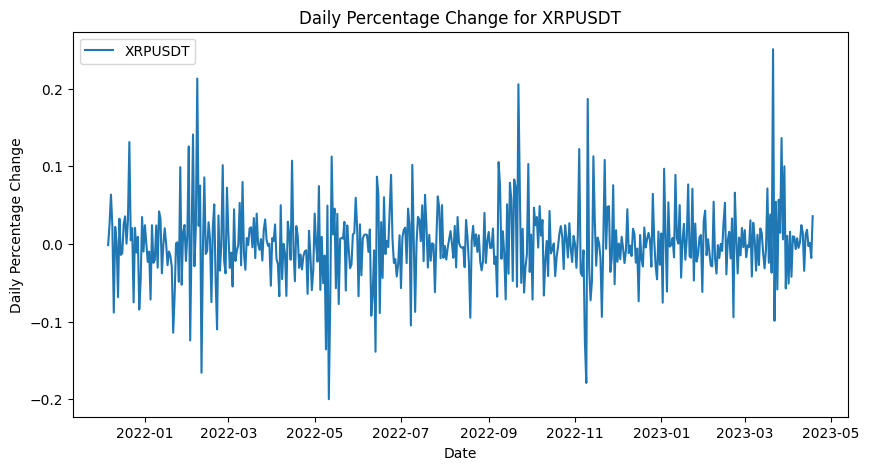

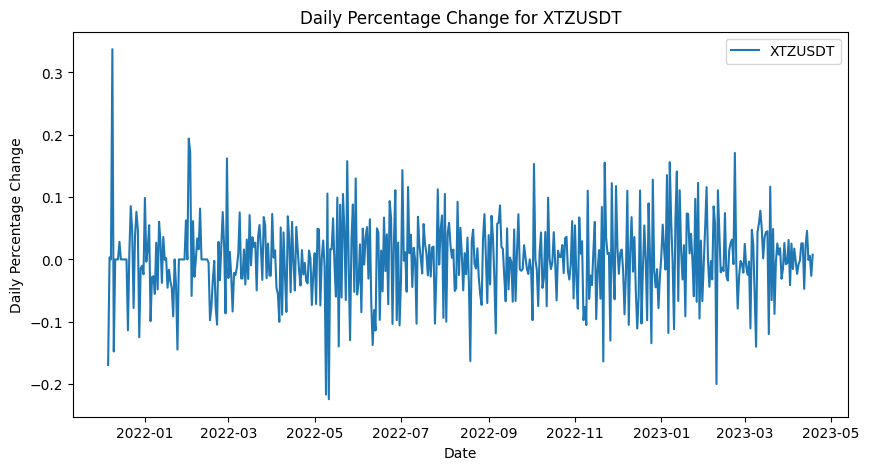

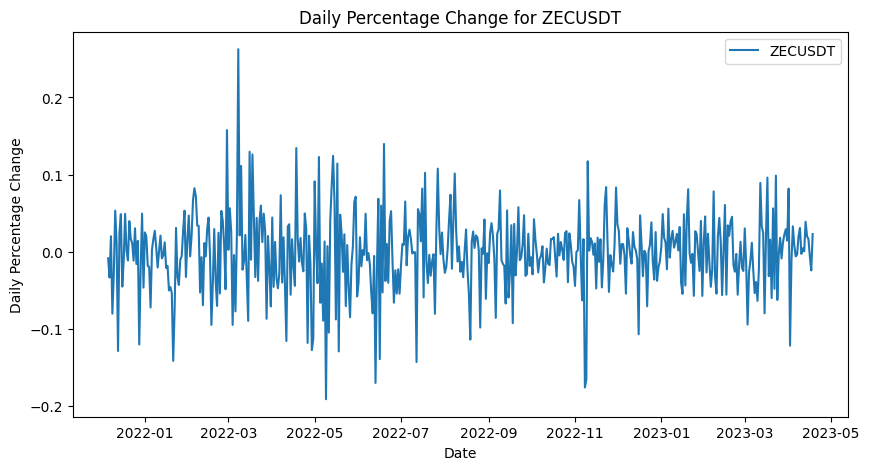

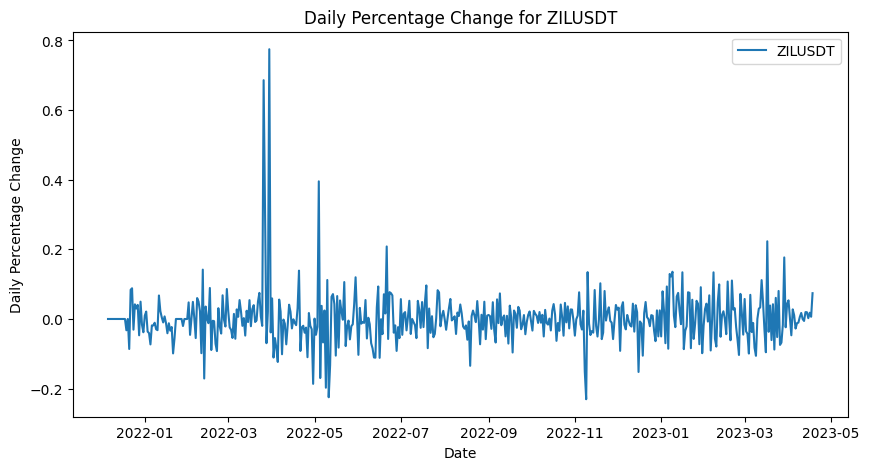

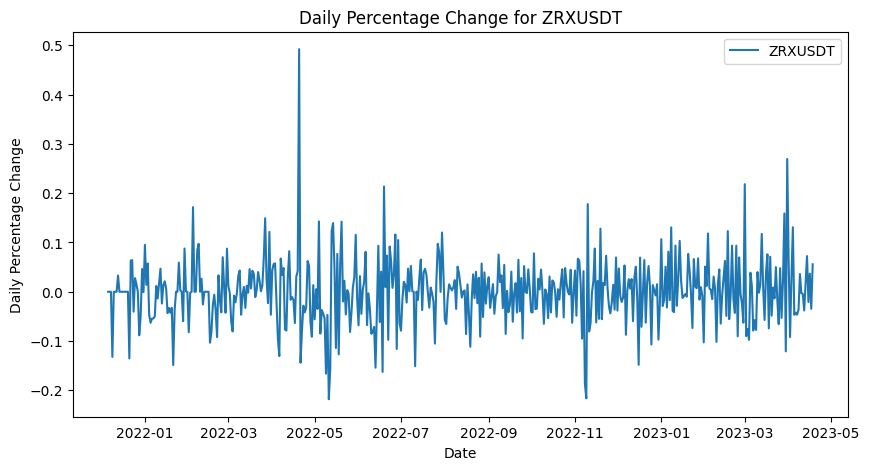

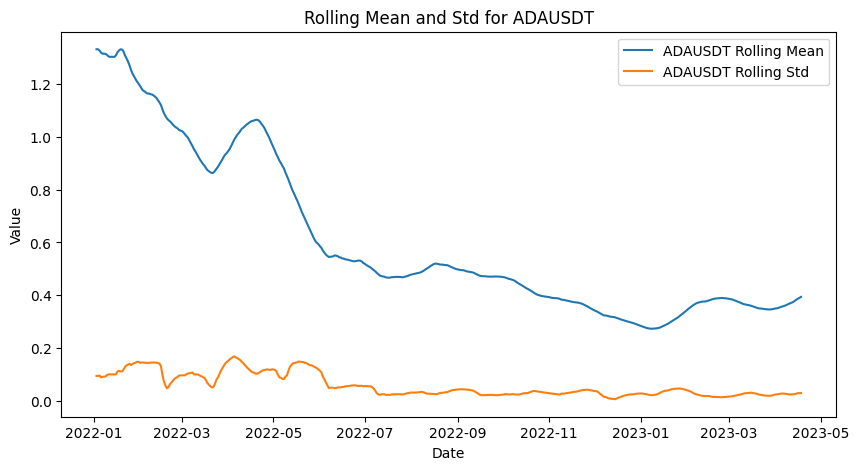

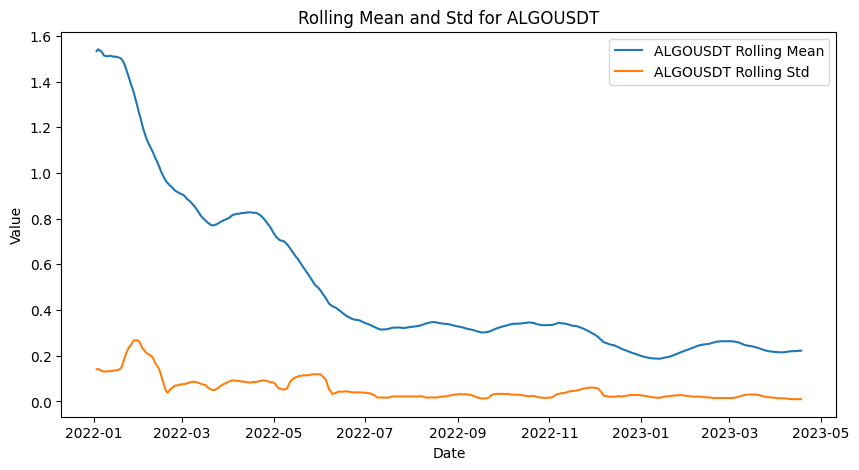

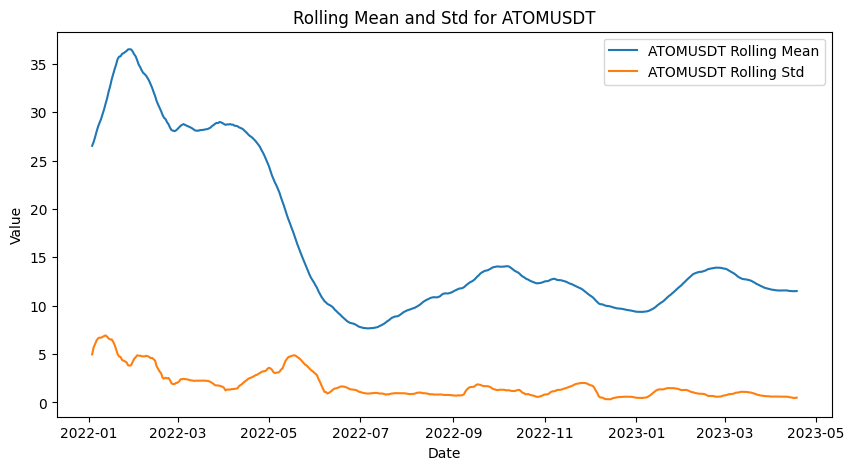

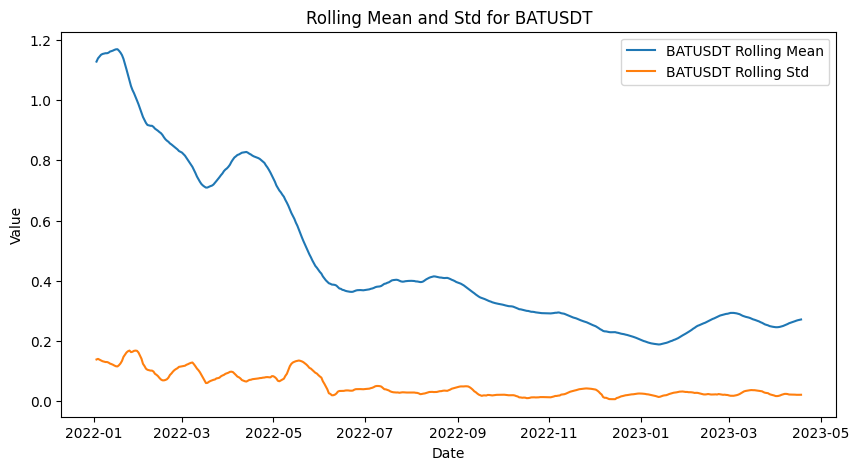

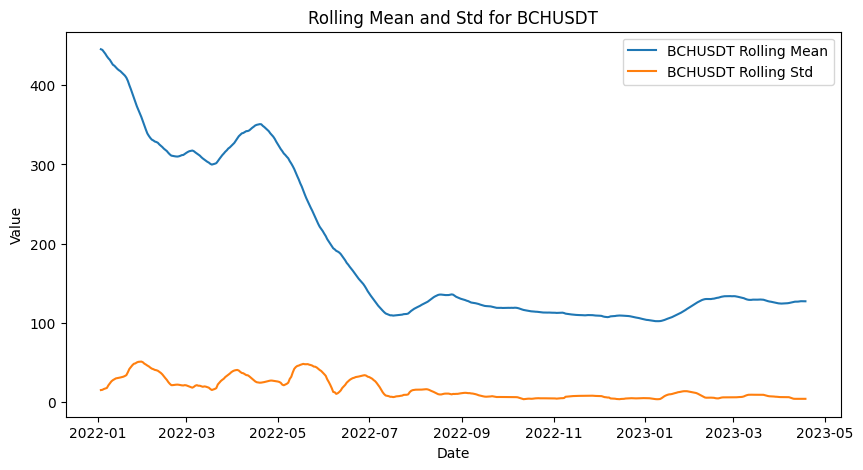

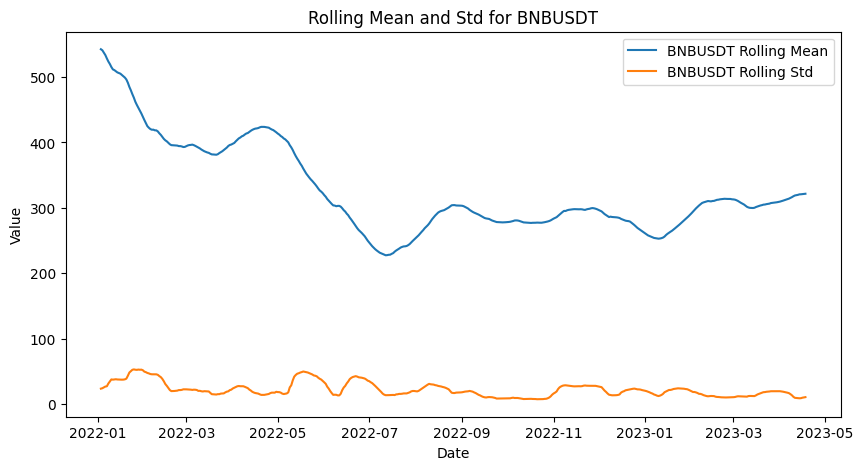

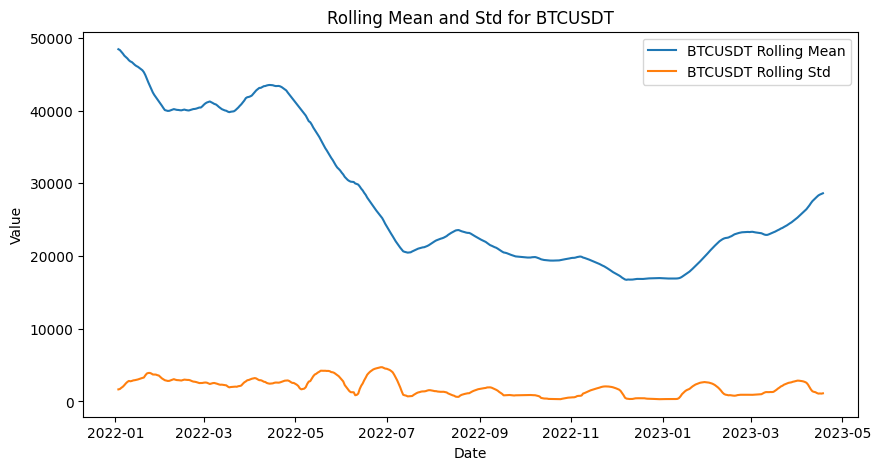

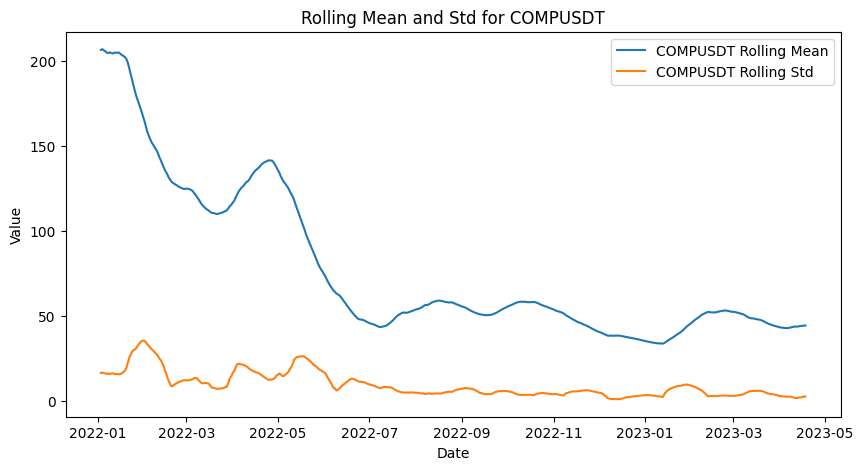

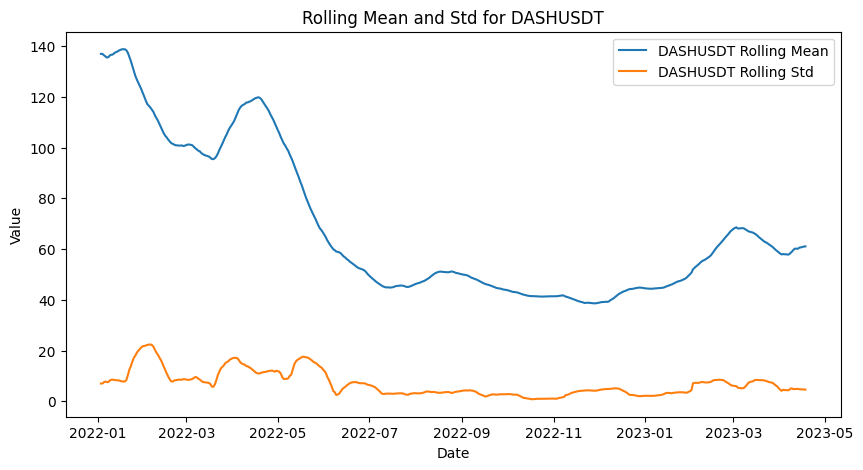

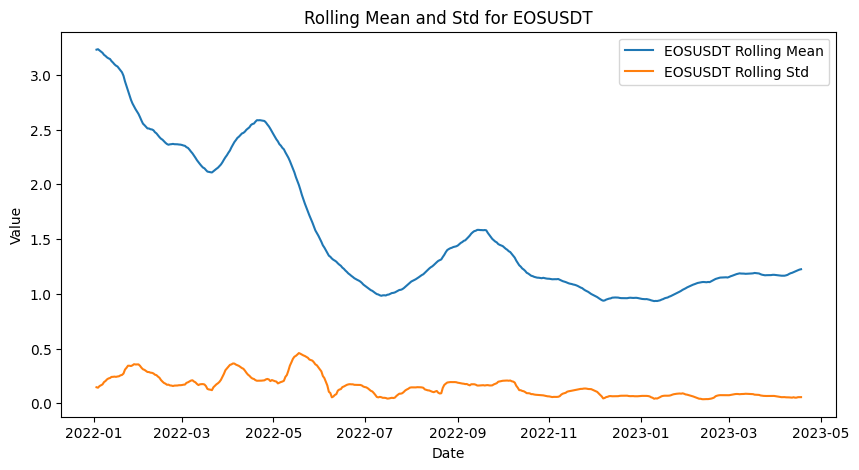

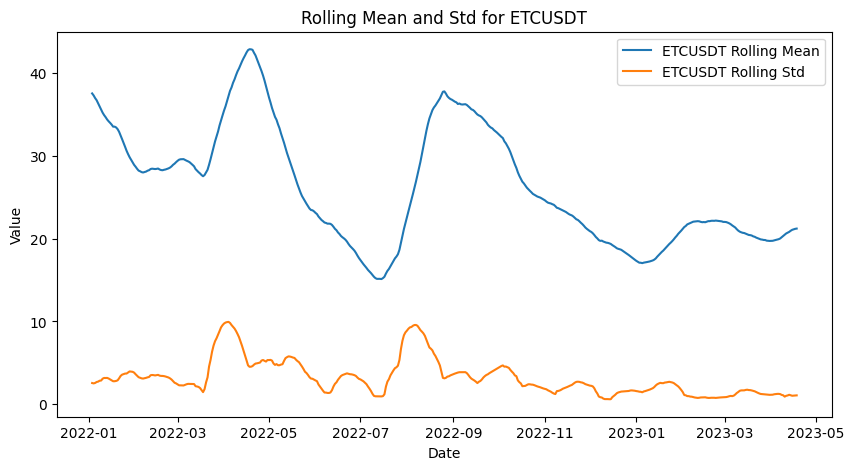

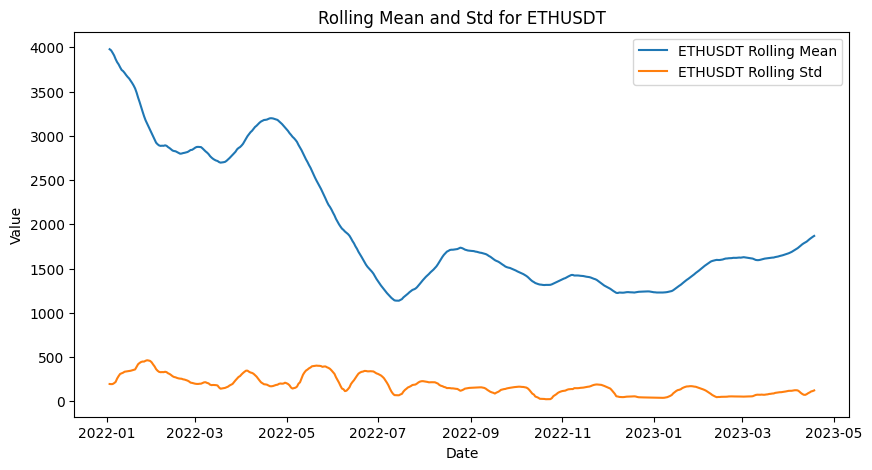

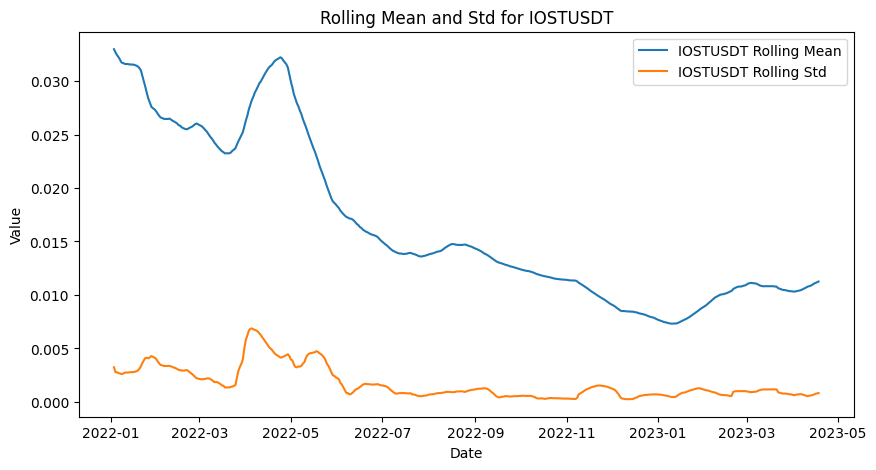

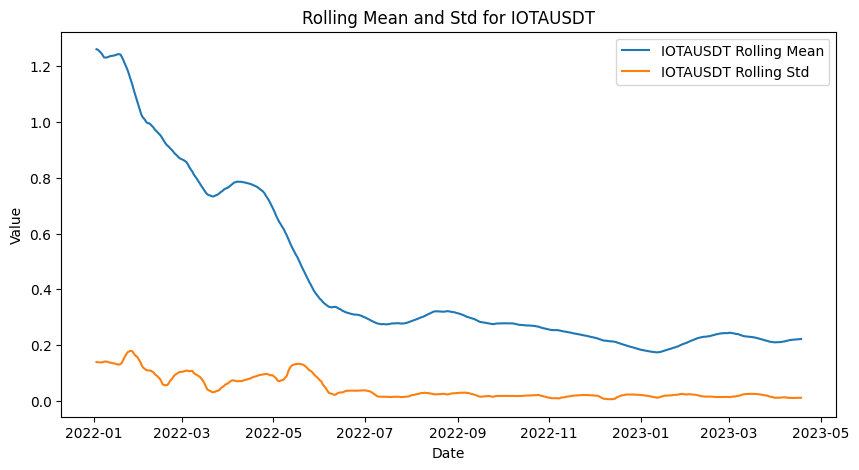

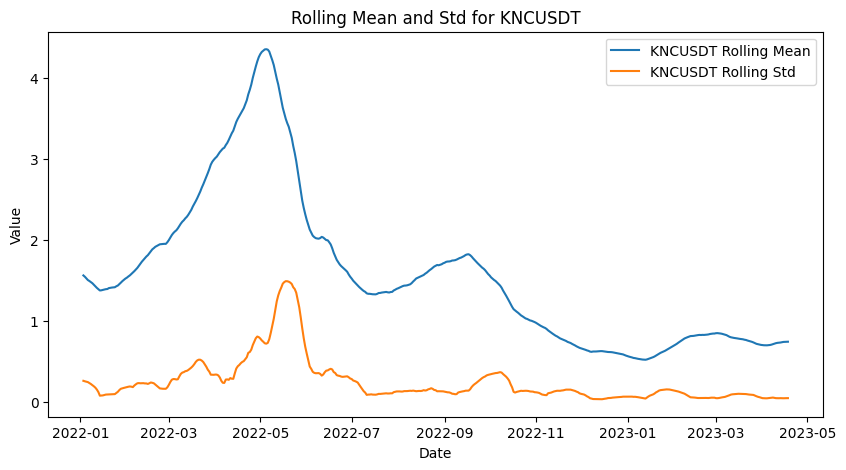

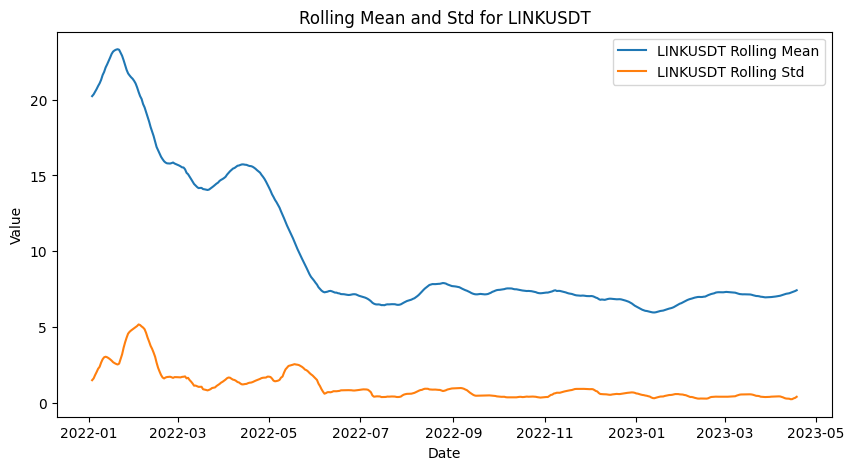

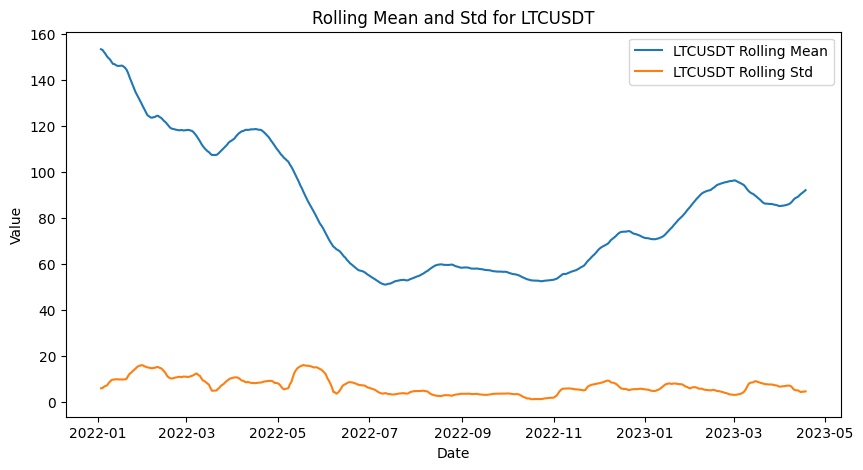

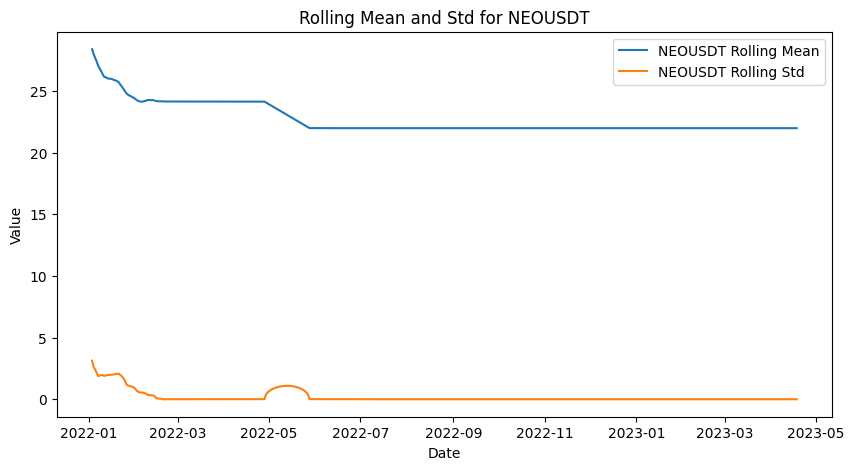

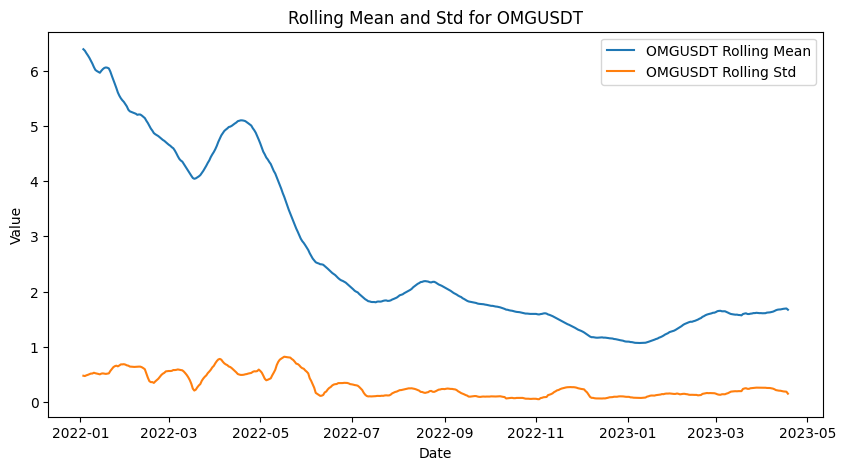

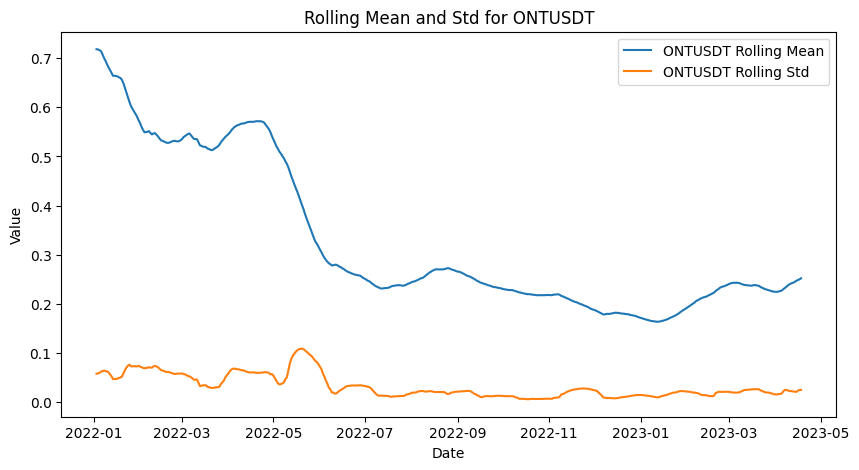

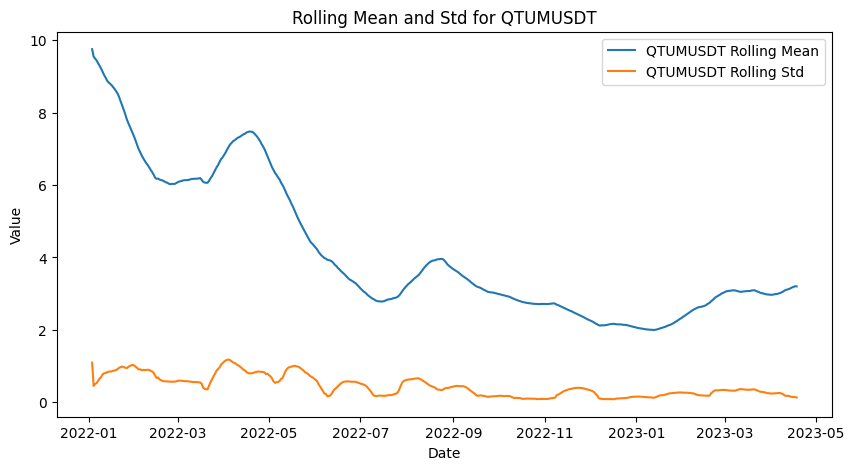

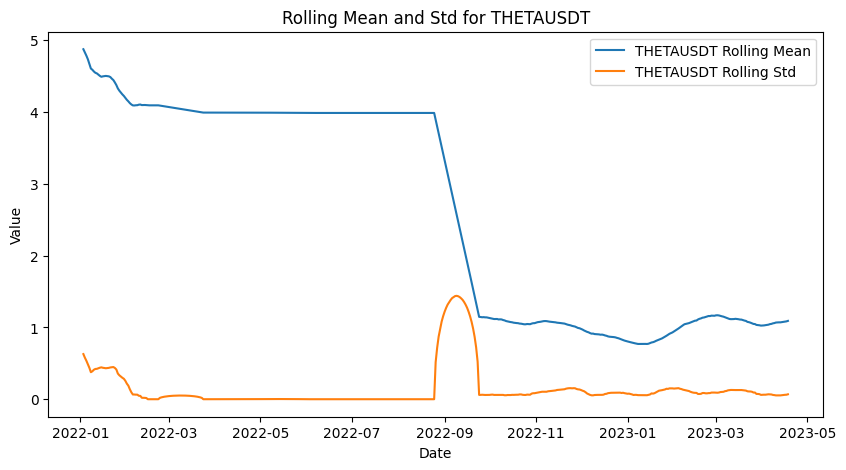

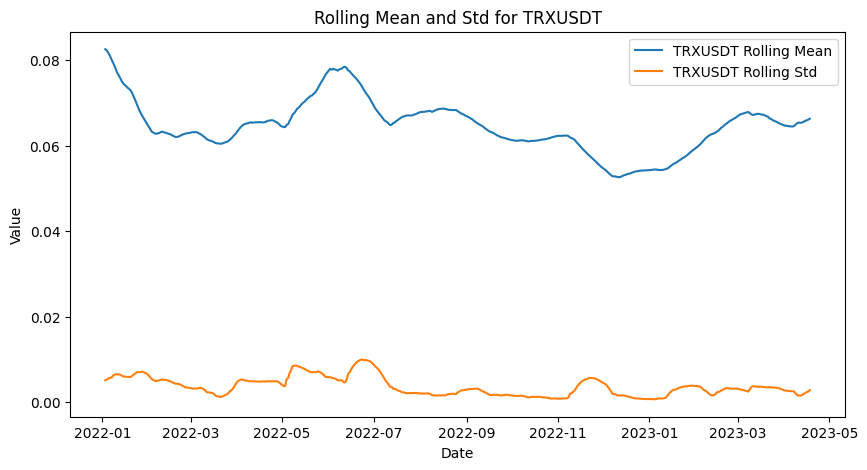

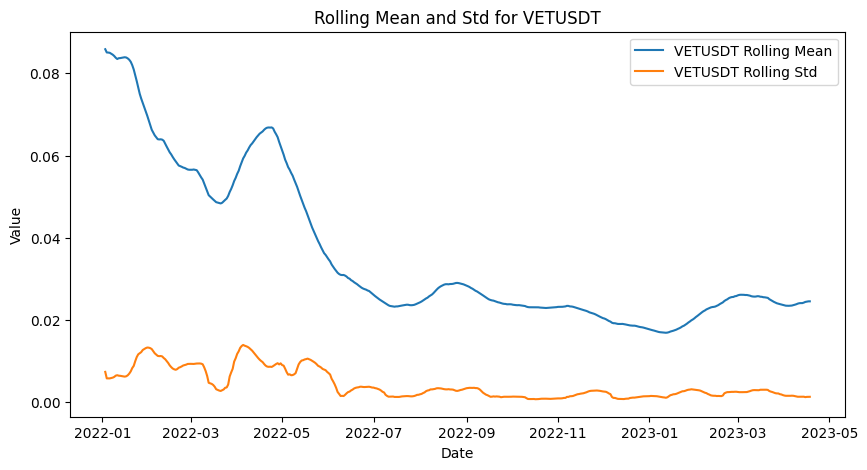

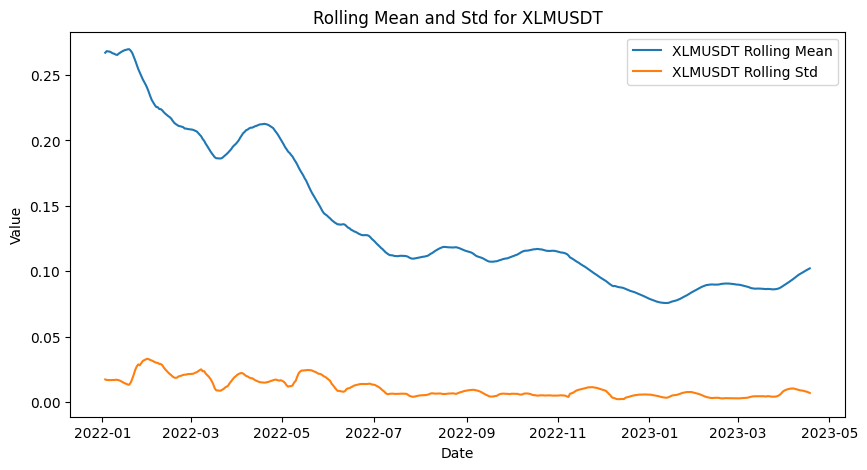

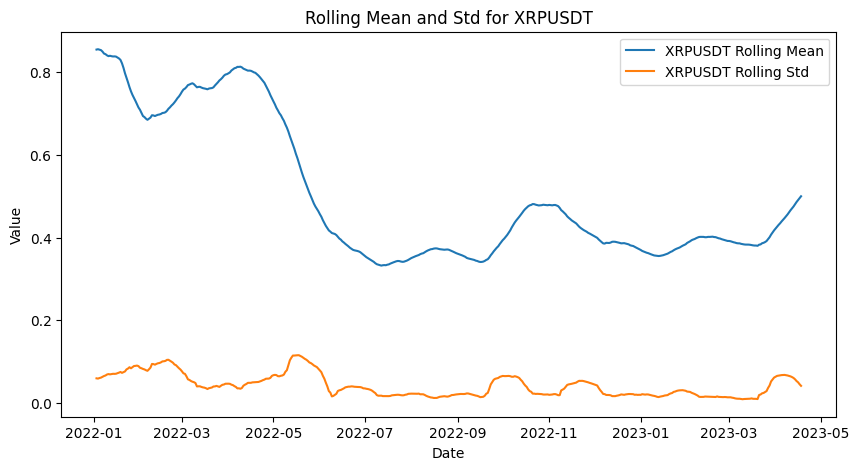

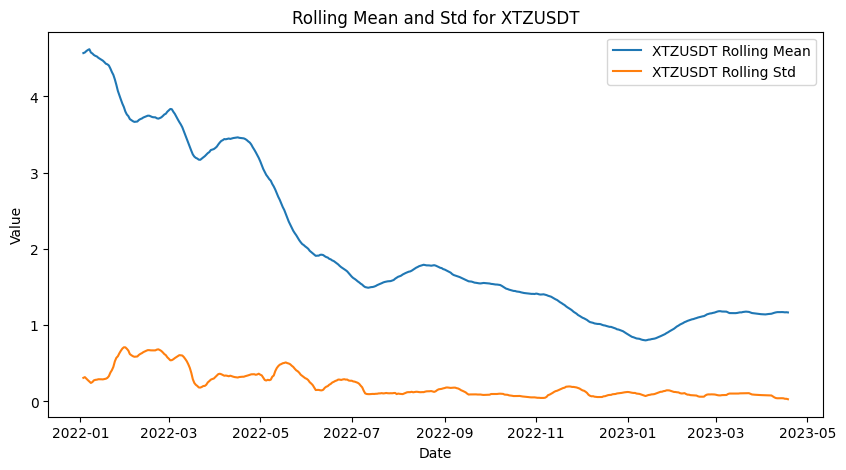

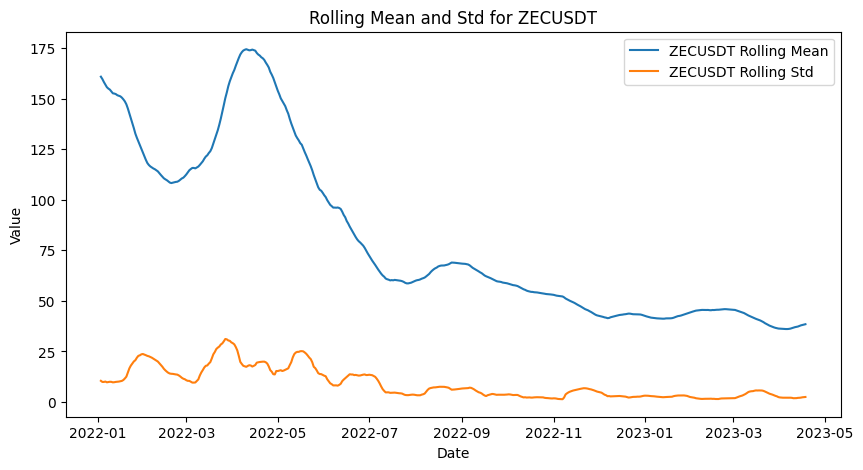

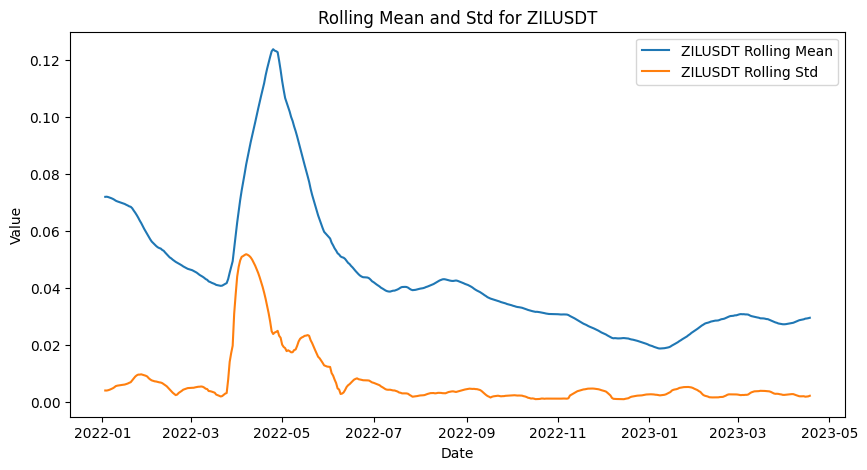

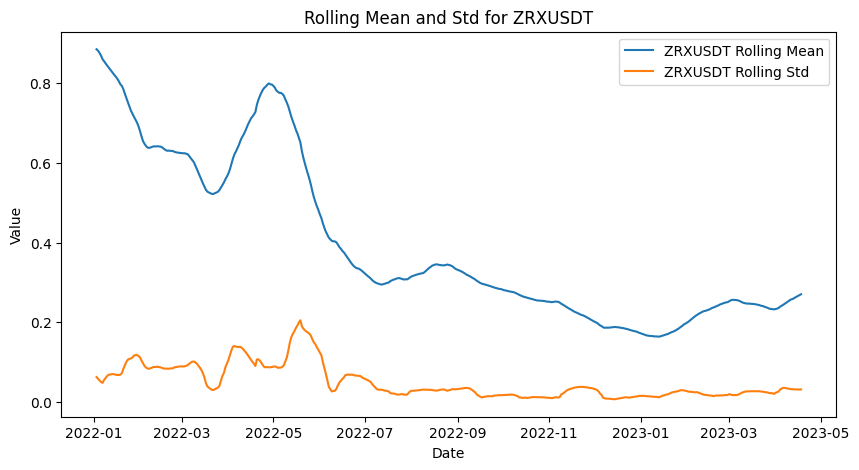

ADAUSDT - Days with high returns: 61, Days with low returns: 64
ALGOUSDT - Days with high returns: 68, Days with low returns: 81
ATOMUSDT - Days with high returns: 72, Days with low returns: 75
BATUSDT - Days with high returns: 67, Days with low returns: 80
BCHUSDT - Days with high returns: 41, Days with low returns: 46
BNBUSDT - Days with high returns: 30, Days with low returns: 35
BTCUSDT - Days with high returns: 23, Days with low returns: 31
COMPUSDT - Days with high returns: 69, Days with low returns: 82
DASHUSDT - Days with high returns: 65, Days with low returns: 67
EOSUSDT - Days with high returns: 83, Days with low returns: 74
ETCUSDT - Days with high returns: 59, Days with low returns: 64
ETHUSDT - Days with high returns: 35, Days with low returns: 46
IOSTUSDT - Days with high returns: 53, Days with low returns: 64
IOTAUSDT - Days with high returns: 67, Days with low returns: 78
KNCUSDT - Days with high returns: 91, Days with low returns: 97
LINKUSDT - Days with high returns:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load historical data
data_dir = "../data"
symbols = [f.split('_')[0] for f in os.listdir(data_dir) if f.endswith('_historical.csv')]

# Function to load data for a symbol
def load_data(symbol):
    return pd.read_csv(f"{data_dir}/{symbol}_historical.csv")

# Visualize closing price over time
for symbol in symbols:
    df = load_data(symbol)
    df['open_time'] = pd.to_datetime(df['open_time'])
    plt.figure(figsize=(10, 5))
    plt.plot(df['open_time'], df['close'], label=symbol)
    plt.title(f"Closing Price Over Time for {symbol}")
    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    plt.legend()
    plt.show()

# Calculate and plot daily percentage change
for symbol in symbols:
    df = load_data(symbol)
    df['open_time'] = pd.to_datetime(df['open_time'])
    df['daily_pct_change'] = df['close'].pct_change()
    plt.figure(figsize=(10, 5))
    plt.plot(df['open_time'], df['daily_pct_change'], label=symbol)
    plt.title(f"Daily Percentage Change for {symbol}")
    plt.xlabel("Date")
    plt.ylabel("Daily Percentage Change")
    plt.legend()
    plt.show()

# Analyze volatility by calculating rolling means and standard deviations
window = 30  # 30-day rolling window
for symbol in symbols:
    df = load_data(symbol)
    df['open_time'] = pd.to_datetime(df['open_time'])
    df['rolling_mean'] = df['close'].rolling(window).mean()
    df['rolling_std'] = df['close'].rolling(window).std()
    plt.figure(figsize=(10, 5))
    plt.plot(df['open_time'], df['rolling_mean'], label=f"{symbol} Rolling Mean")
    plt.plot(df['open_time'], df['rolling_std'], label=f"{symbol} Rolling Std")
    plt.title(f"Rolling Mean and Std for {symbol}")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

# Analyze days with unusually high or low returns
threshold = 0.05  # 5% daily change
for symbol in symbols:
    df = load_data(symbol)
    df['open_time'] = pd.to_datetime(df['open_time'])
    df['daily_pct_change'] = df['close'].pct_change()
    high_returns = df[df['daily_pct_change'] > threshold]
    low_returns = df[df['daily_pct_change'] < -threshold]
    print(f"{symbol} - Days with high returns: {len(high_returns)}, Days with low returns: {len(low_returns)}")